In [2]:
library(FNN)
library(dplyr)
library(nnet)
library(ggplot2)
library(reshape2)
library(purrr)
library(tidyr)
library(ggplot2)
library(glmnet)
library(GA)
library(tree)
library(Epi)
library(party)
library(pROC)
library(ROCR)
library(tree)
library(ROCR)
library(ggplot2)
library(foreign)
library(rpart)
library(rpart.plot)
library(rattle)
library(h2o)
h2o.init(nthreads = 4)


H2O is not running yet, starting it now...

Note:  In case of errors look at the following log files:
    C:\Users\user\AppData\Local\Temp\RtmpYHESX0\file3f58171e6e5b/h2o_user_started_from_r.out
    C:\Users\user\AppData\Local\Temp\RtmpYHESX0\file3f5824b55351/h2o_user_started_from_r.err


Starting H2O JVM and connecting: . Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         5 seconds 311 milliseconds 
    H2O cluster timezone:       Asia/Seoul 
    H2O data parsing timezone:  UTC 
    H2O cluster version:        3.32.1.3 
    H2O cluster version age:    6 days  
    H2O cluster name:           H2O_started_from_R_user_mzt353 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   1.71 GB 
    H2O cluster total cores:    8 
    H2O cluster allowed cores:  4 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal Securit

In [3]:
#test<-read.csv("C:/Users/user/PycharmProjects/4_1_multivariate analysis/test_values.csv")
train_y<-read.csv("C:/Users/user/PycharmProjects/4_1_multivariate analysis/train_labels.csv")
train<-read.csv("C:/Users/user/PycharmProjects/4_1_multivariate analysis/train_values.csv")


In [4]:
str(train)

'data.frame':	260601 obs. of  39 variables:
 $ building_id                           : int  802906 28830 94947 590882 201944 333020 728451 475515 441126 989500 ...
 $ geo_level_1_id                        : int  6 8 21 22 11 8 9 20 0 26 ...
 $ geo_level_2_id                        : int  487 900 363 418 131 558 475 323 757 886 ...
 $ geo_level_3_id                        : int  12198 2812 8973 10694 1488 6089 12066 12236 7219 994 ...
 $ count_floors_pre_eq                   : int  2 2 2 2 3 2 2 2 2 1 ...
 $ age                                   : int  30 10 10 10 30 10 25 0 15 0 ...
 $ area_percentage                       : int  6 8 5 6 8 9 3 8 8 13 ...
 $ height_percentage                     : int  5 7 5 5 9 5 4 6 6 4 ...
 $ land_surface_condition                : chr  "t" "o" "t" "t" ...
 $ foundation_type                       : chr  "r" "r" "r" "r" ...
 $ roof_type                             : chr  "n" "n" "n" "n" ...
 $ ground_floor_type                     : chr  "f" "x" "f" "

16번째 var부터 끝까지 있는 int형식의 변수들은 사실상 factor이기 때문에 변환해줘야 한다.

* count_families 제외 --> 28 번 제외

In [5]:
train[,c(16:27)] <-train[,c(16:27)] %>% mutate_if(is.integer,as.factor)
train[,c(29:39)] <-train[,c(29:39)] %>% mutate_if(is.integer,as.factor)


In [6]:
str(train)

'data.frame':	260601 obs. of  39 variables:
 $ building_id                           : int  802906 28830 94947 590882 201944 333020 728451 475515 441126 989500 ...
 $ geo_level_1_id                        : int  6 8 21 22 11 8 9 20 0 26 ...
 $ geo_level_2_id                        : int  487 900 363 418 131 558 475 323 757 886 ...
 $ geo_level_3_id                        : int  12198 2812 8973 10694 1488 6089 12066 12236 7219 994 ...
 $ count_floors_pre_eq                   : int  2 2 2 2 3 2 2 2 2 1 ...
 $ age                                   : int  30 10 10 10 30 10 25 0 15 0 ...
 $ area_percentage                       : int  6 8 5 6 8 9 3 8 8 13 ...
 $ height_percentage                     : int  5 7 5 5 9 5 4 6 6 4 ...
 $ land_surface_condition                : chr  "t" "o" "t" "t" ...
 $ foundation_type                       : chr  "r" "r" "r" "r" ...
 $ roof_type                             : chr  "n" "n" "n" "n" ...
 $ ground_floor_type                     : chr  "f" "x" "f" "

# 전처리

1. numeric 변수 없에기
2. integer(binary제외) 변수만 추출 --> histogram
3. character 변수 추출 --> bar
4. binary 변수 추출 --> bar


[너무 변수가 많기에 이 링크에 나온 내용을 활용하여 plot을 그룹화 했습니다](https://drsimonj.svbtle.com/quick-plot-of-all-variables)

In [7]:
# numeric변수만 찾기
data_num2<-train %>% keep(is.numeric)
# character변수만 찾기
data_char <- train %>% keep(is.character)

In [8]:
str(data_num2)

'data.frame':	260601 obs. of  9 variables:
 $ building_id        : int  802906 28830 94947 590882 201944 333020 728451 475515 441126 989500 ...
 $ geo_level_1_id     : int  6 8 21 22 11 8 9 20 0 26 ...
 $ geo_level_2_id     : int  487 900 363 418 131 558 475 323 757 886 ...
 $ geo_level_3_id     : int  12198 2812 8973 10694 1488 6089 12066 12236 7219 994 ...
 $ count_floors_pre_eq: int  2 2 2 2 3 2 2 2 2 1 ...
 $ age                : int  30 10 10 10 30 10 25 0 15 0 ...
 $ area_percentage    : int  6 8 5 6 8 9 3 8 8 13 ...
 $ height_percentage  : int  5 7 5 5 9 5 4 6 6 4 ...
 $ count_families     : int  1 1 1 1 1 1 1 1 1 1 ...


In [9]:
# numeric 변수 제외하고  뽑기
data_not_num = train[, !(names(train)) %in% colnames(data_num2)]

# 또 그중 char 변수 제외하고 뽑기
data_not_char = data_not_num[, !(names(data_not_num)) %in% colnames(data_char)]


# 이렇게 데이터를 나눈 이유는 아래 plot을 이쁘게 그리기 위해서 이다

In [10]:
# character 변수들 factor로 바꾸고 plot하기
data_fac2 <- data_not_num %>% mutate_if(is.character,as.factor)
str(data_fac2)

'data.frame':	260601 obs. of  30 variables:
 $ land_surface_condition                : Factor w/ 3 levels "n","o","t": 3 2 3 3 3 3 1 3 3 3 ...
 $ foundation_type                       : Factor w/ 5 levels "h","i","r","u",..: 3 3 3 3 3 3 3 5 3 2 ...
 $ roof_type                             : Factor w/ 3 levels "n","q","x": 1 1 1 1 1 1 1 2 2 1 ...
 $ ground_floor_type                     : Factor w/ 5 levels "f","m","v","x",..: 1 4 1 1 1 1 4 3 1 3 ...
 $ other_floor_type                      : Factor w/ 4 levels "j","q","s","x": 2 2 4 4 4 2 2 4 2 1 ...
 $ position                              : Factor w/ 4 levels "j","o","s","t": 4 3 4 3 3 3 3 3 3 3 ...
 $ plan_configuration                    : Factor w/ 10 levels "a","c","d","f",..: 3 3 3 3 3 3 3 10 3 3 ...
 $ has_superstructure_adobe_mud          : Factor w/ 2 levels "0","1": 2 1 1 1 2 1 1 1 1 1 ...
 $ has_superstructure_mud_mortar_stone   : Factor w/ 2 levels "0","1": 2 2 2 2 1 2 2 1 2 1 ...
 $ has_superstructure_stone_flag         :

# A1 
## numeric 이 아닌 변수들의 bar plot

Warning message:
"attributes are not identical across measure variables;
they will be dropped"


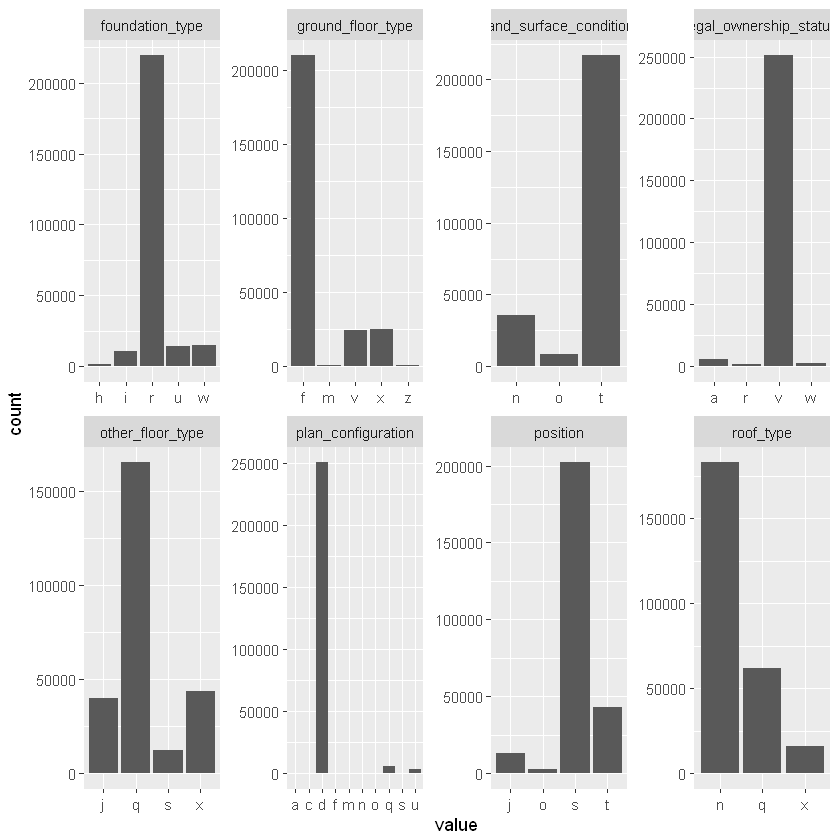

In [11]:
data_char <- data_char %>% mutate_if(is.character,as.factor)
data_char %>%
  keep(is.factor) %>% 
  gather() %>% 
  ggplot(aes(value)) +
    facet_wrap(~ key, scales = "free",ncol=4) +
    geom_bar()

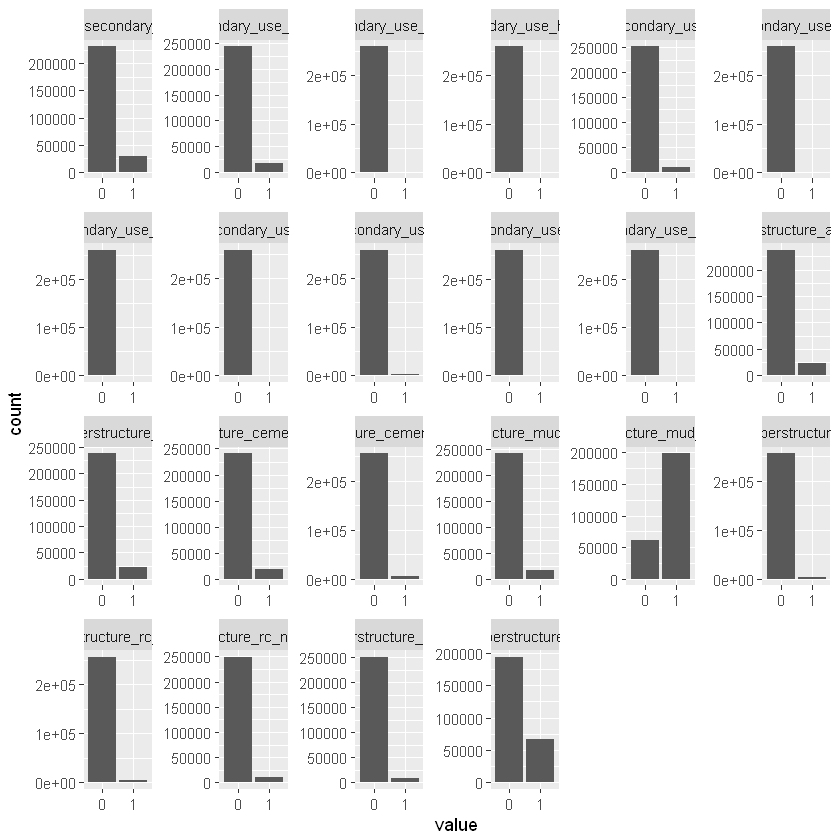

In [12]:
data_not_char %>%
  keep(is.factor) %>% 
  gather() %>% 
  ggplot(aes(value)) +
    facet_wrap(~ key, scales = "free",ncol=6) +
    geom_bar()

## 의존 변수의 bar plot

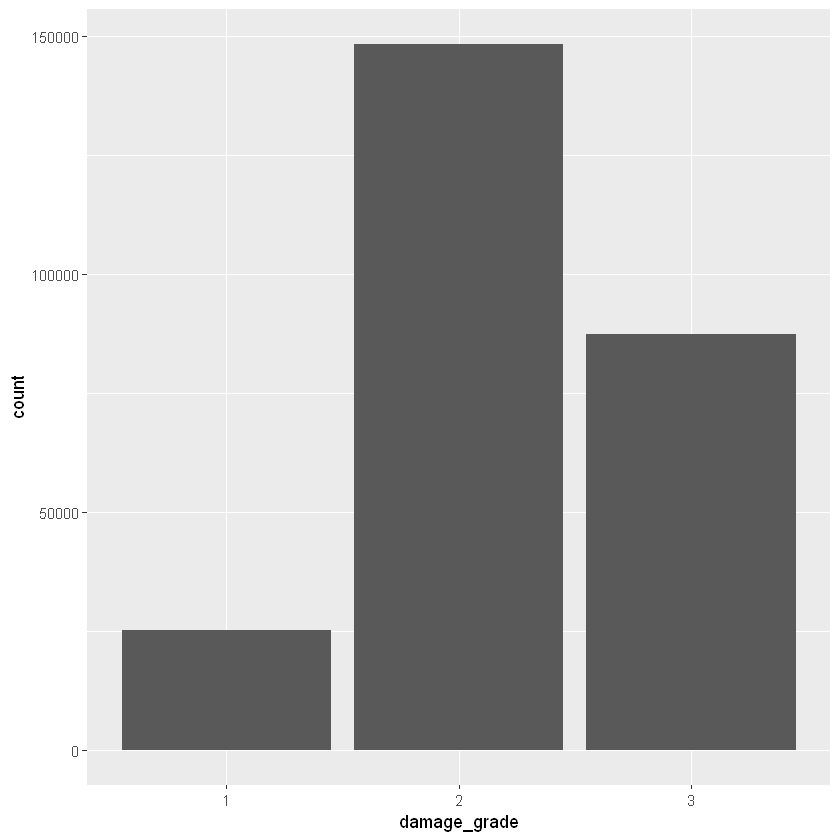

In [13]:
# 의존변수 plot
train_y$damage_grade<- as.factor(train_y$damage_grade)
ggplot(data=train_y, aes(x=damage_grade))+geom_bar()

## a8의 decision tree 를 위한 data형

In [14]:
data_1 <- cbind(data_num2,data_char,data_not_char)
data_dt <- merge(data_1,train_y)
data_dt <- data_dt[,-1]

In [15]:
head(data_dt)

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,count_families,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,30,266,1224,1,25,5,2,0,t,r,...,0,0,0,0,0,0,0,0,0,2
2,17,409,12182,2,0,13,7,1,t,r,...,0,0,0,0,0,0,0,0,0,3
3,17,716,7056,2,5,12,6,1,o,r,...,0,0,0,0,0,0,0,0,0,3
4,4,651,105,2,80,5,4,1,n,r,...,0,0,0,0,0,0,0,0,0,2
5,3,1387,3909,5,40,5,10,1,t,r,...,0,0,0,0,0,0,0,0,0,2
6,26,1132,6645,2,0,6,6,1,t,w,...,0,0,0,0,0,0,0,0,0,1


# A2 

character 변수들을 one-hot encoding으로 변환을 한다
아래 함수를 이용하여 각 변수마다 1-of -C encoding을 하고 독립성을 만족하기 위해 첫번째 칼럼을 버린다

    class.ind()

In [16]:
#data_fac2 : character to numeric
dummy1 <- class.ind(data_char[,1])[,-1]
colnames(dummy1) <- paste(rep(colnames(data_char)[1],ncol(dummy1)),colnames(dummy1),sep="_")

dummy2 <- class.ind(data_char[,2])[,-1]
colnames(dummy2) <- paste(rep(colnames(data_char)[2],ncol(dummy2)),colnames(dummy2),sep="_")

dummy3 <- class.ind(data_char[,3])[,-1]
colnames(dummy3) <- paste(rep(colnames(data_char)[3],ncol(dummy3)),colnames(dummy3),sep="_")

dummy4 <- class.ind(data_char[,4])[,-1]
colnames(dummy4) <- paste(rep(colnames(data_char)[4],ncol(dummy4)),colnames(dummy4),sep="_")

dummy5 <- class.ind(data_char[,5])[,-1]
colnames(dummy5) <- paste(rep(colnames(data_char)[5],ncol(dummy5)),colnames(dummy5),sep="_")

dummy6 <- class.ind(data_char[,6])[,-1]
colnames(dummy6) <- paste(rep(colnames(data_char)[6],ncol(dummy6)),colnames(dummy6),sep="_")

dummy7 <- class.ind(data_char[,7])[,-1]
colnames(dummy7) <- paste(rep(colnames(data_char)[7],ncol(dummy7)),colnames(dummy7),sep="_")

dummy8 <- class.ind(data_char[,8])[,-1]
colnames(dummy8) <- paste(rep(colnames(data_char)[8],ncol(dummy8)),colnames(dummy8),sep="_")


dummys <- cbind(dummy1, dummy2, dummy3, dummy4, dummy5, dummy6, dummy7, dummy8)
data<-cbind(data_num2,dummys,data_not_char)
str(data)


'data.frame':	260601 obs. of  61 variables:
 $ building_id                           : int  802906 28830 94947 590882 201944 333020 728451 475515 441126 989500 ...
 $ geo_level_1_id                        : int  6 8 21 22 11 8 9 20 0 26 ...
 $ geo_level_2_id                        : int  487 900 363 418 131 558 475 323 757 886 ...
 $ geo_level_3_id                        : int  12198 2812 8973 10694 1488 6089 12066 12236 7219 994 ...
 $ count_floors_pre_eq                   : int  2 2 2 2 3 2 2 2 2 1 ...
 $ age                                   : int  30 10 10 10 30 10 25 0 15 0 ...
 $ area_percentage                       : int  6 8 5 6 8 9 3 8 8 13 ...
 $ height_percentage                     : int  5 7 5 5 9 5 4 6 6 4 ...
 $ count_families                        : int  1 1 1 1 1 1 1 1 1 1 ...
 $ land_surface_condition_o              : num  0 1 0 0 0 0 0 0 0 0 ...
 $ land_surface_condition_t              : num  1 0 1 1 1 1 0 1 1 1 ...
 $ foundation_type_i                     : num  0

## a9의 MLR을 위한 데이터 형

In [17]:
data_mlr <- merge(data,train_y)
str(data_mlr)
data_mlr <- data_mlr[,-1]

'data.frame':	260601 obs. of  62 variables:
 $ building_id                           : int  4 8 12 16 17 25 28 31 34 36 ...
 $ geo_level_1_id                        : int  30 17 17 4 3 26 8 6 7 20 ...
 $ geo_level_2_id                        : int  266 409 716 651 1387 1132 1297 398 555 508 ...
 $ geo_level_3_id                        : int  1224 12182 7056 105 3909 6645 9721 4512 2763 10459 ...
 $ count_floors_pre_eq                   : int  1 2 2 2 5 2 2 2 3 2 ...
 $ age                                   : int  25 0 5 80 40 0 0 30 40 5 ...
 $ area_percentage                       : int  5 13 12 5 5 6 2 10 5 7 ...
 $ height_percentage                     : int  2 7 6 4 10 6 6 5 6 6 ...
 $ count_families                        : int  0 1 1 1 1 1 1 0 2 1 ...
 $ land_surface_condition_o              : num  0 0 1 0 0 0 0 0 0 0 ...
 $ land_surface_condition_t              : num  1 1 0 0 1 1 1 1 1 1 ...
 $ foundation_type_i                     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ foundation_ty

## data for ann

In [18]:
# df non-normalized data set
df <- merge(data,train_y)
df_x <- df[,-c(1,62)]
df_y <- class.ind(df[,62])


In [19]:
# df2 : normalized data set : ann을 만들기 위해 scale했습니다

data_<-scale(data_num2[,-1], center = TRUE, scale = TRUE)
df_<-cbind(data_num2$building_id, data_, dummys, data_not_char)
colnames(df_)[1]<-"building_id"
df2 <- merge(df_,train_y)
df2_x <- df2[,-c(1,62)]
df2_y <- class.ind(df2[,62])


Data 7:3으로 분리

In [104]:
set.seed(12345) 
nr = nrow(df2)

trn_idx <- c(1:50000)
val_idx<-c(50001:110602)
tst_idx<-c(110603:260601 )

trn_data_x <- df2_x[trn_idx,]
val_data_x <- df2_x[val_idx,]
tst_data_x <- df2_x[tst_idx,]

trn_data_y <- df2_y[trn_idx,]
val_data_y <- df2_y[val_idx,]
tst_data_y <- df2_y[tst_idx,]

In [21]:
perf_eval_multi <- function(cm){  
    
 
  # Simple Accuracy
  ACC = sum(diag(cm))/sum(cm)  
  # Balanced Correction Rate
  BCR = 1
  for (i in 1:dim(cm)[1]){
    BCR = BCR*(cm[i,i]/sum(cm[i,])) 
  }
  BCR = BCR^(1/dim(cm)[1])
  return(c(ACC, BCR))
}

perf_summary <- matrix(0, nrow = 4, ncol = 2)
colnames(perf_summary) <- c("ACC", "BCR")
rownames(perf_summary) <- c("ANN","ANN+GA","Decision Tree","MLR")

# A3

In [105]:
# Candidate hidden nodes
nH <- seq(from=2, to=30, by=4) # 총 7개
mit<- seq(from=100, to=500, by=100) # 총 5개
# 5-fold cross validation index
val_idx <- sample(c(1:5), dim(trn_data_x)[1], replace = TRUE, prob = rep(0.2,5))
val_perf <- matrix(0, length(nH)*length(mit), 4)


In [106]:
ptm <- proc.time()

num <-1
for (i in 1:length(nH)) {
  
  cat("Training ANN: the number of hidden nodes:", nH[i], "\n")
  eval_fold <- c()
  
  for (k in 1:length(mit)) {
      cat("num:",num,"nh:",nH[i],"max iter:",mit[k],"\n")
      
      for (j in c(1:5)){
           # Training with the data in (k-1) folds
        tmp_trn_input <- trn_data_x[which(val_idx != j),]
        tmp_trn_target <- trn_data_y[which(val_idx != j),]    
        tmp_nnet <- nnet(tmp_trn_input, tmp_trn_target, size = nH[i], decay = 5e-4, maxit = mit[k],MaxNWts=999999)

        # Evaluate the model withe the remaining 1 fold
        tmp_val_input <- trn_data_x[which(val_idx == j),]
        tmp_val_target <- trn_data_y[which(val_idx == j),]    

        eval_fold <- rbind(eval_fold, cbind(max.col(tmp_val_target), 
                                            max.col(predict(tmp_nnet, tmp_val_input))))

      }   
      # Confusion matrix : 언제나 1,2,3 이 존재하도록 일부러 넣어주고 밑의 diag함수를 통해 조정한다
      cfm <- table(c(eval_fold[,1],1,2,3), c(eval_fold[,2],1,2,3))
      diag(cfm) <- diag(cfm)-1
      # nH
      val_perf[num,1] <-nH[i]
      #max iter
      val_perf[num,2] <-mit[k]

      # Record the validation performance
      val_perf[num,3:4] <- perf_eval_multi(cfm)
      num <- num + 1
  } 
}

proc.time() - ptm




Training ANN: the number of hidden nodes: 2 
num: 1 nh: 2 max iter: 100 
# weights:  131
initial  value 30426.176808 
iter  10 value 22105.315451
iter  20 value 21063.423038
iter  30 value 20889.935751
iter  40 value 20761.335796
iter  50 value 20579.432632
iter  60 value 20404.066088
iter  70 value 20202.398876
iter  80 value 20097.620751
iter  90 value 20071.345561
iter 100 value 20047.282009
final  value 20047.282009 
stopped after 100 iterations
# weights:  131
initial  value 30899.252498 
iter  10 value 21614.577216
iter  20 value 20986.325949
iter  30 value 20675.509560
iter  40 value 20593.761292
iter  50 value 20577.576484
iter  60 value 20560.443576
iter  70 value 20547.734599
iter  80 value 20534.745637
iter  90 value 20506.742099
iter 100 value 20473.058607
final  value 20473.058607 
stopped after 100 iterations
# weights:  131
initial  value 31515.994208 
iter  10 value 21201.902304
iter  20 value 20560.090830
iter  30 value 20271.656591
iter  40 value 20039.298088
iter  50

initial  value 39194.202456 
iter  10 value 34276.274503
iter  20 value 33494.234041
iter  30 value 33469.077332
iter  40 value 33449.361975
iter  50 value 33439.446896
iter  60 value 33421.269211
iter  70 value 33405.960556
iter  80 value 33332.776270
iter  90 value 28624.060013
iter 100 value 26896.341303
iter 110 value 26744.868015
iter 120 value 26642.279497
iter 130 value 26554.826443
iter 140 value 26145.853100
iter 150 value 25966.930405
iter 160 value 25880.589359
iter 170 value 25852.037621
iter 180 value 21114.318195
iter 190 value 20927.254861
iter 200 value 20903.014441
iter 210 value 20884.224798
iter 220 value 20876.078799
iter 230 value 20871.023618
iter 240 value 20865.691008
iter 250 value 20858.839679
iter 260 value 20842.270829
iter 270 value 20821.814309
iter 280 value 20778.523485
iter 290 value 20709.217451
iter 300 value 20662.003299
final  value 20662.003299 
stopped after 300 iterations
num: 4 nh: 2 max iter: 400 
# weights:  131
initial  value 25627.268639 
it

initial  value 27489.206758 
iter  10 value 21357.817974
iter  20 value 20649.436418
iter  30 value 20388.768142
iter  40 value 20157.113174
iter  50 value 20013.068970
iter  60 value 19888.539330
iter  70 value 19842.014815
iter  80 value 19813.360872
iter  90 value 19779.198530
iter 100 value 19760.524667
iter 110 value 19737.411617
iter 120 value 19733.707749
iter 130 value 19727.890784
iter 140 value 19720.651349
iter 150 value 19713.337068
iter 160 value 19711.166072
iter 170 value 19710.437273
iter 180 value 19710.219724
iter 190 value 19709.918025
iter 200 value 19709.767374
iter 210 value 19709.717422
iter 220 value 19709.651263
iter 230 value 19709.401981
iter 240 value 19709.235951
iter 250 value 19709.124045
iter 260 value 19708.449627
iter 270 value 19708.263662
iter 280 value 19708.226444
iter 290 value 19708.185996
iter 300 value 19708.178275
iter 300 value 19708.178087
iter 300 value 19708.178087
final  value 19708.178087 
converged
# weights:  131
initial  value 25288.0

initial  value 32691.248040 
iter  10 value 21962.216422
iter  20 value 20953.231427
iter  30 value 20475.303682
iter  40 value 20204.940183
iter  50 value 19969.805475
iter  60 value 19739.890901
iter  70 value 19541.598589
iter  80 value 19310.309798
iter  90 value 19146.922716
iter 100 value 19056.816712
iter 110 value 19000.478388
iter 120 value 18962.301365
iter 130 value 18934.429100
iter 140 value 18916.511861
iter 150 value 18870.178530
iter 160 value 18791.532961
iter 170 value 18715.586706
iter 180 value 18663.714794
iter 190 value 18631.900805
iter 200 value 18595.882151
iter 210 value 18566.500242
iter 220 value 18532.985451
iter 230 value 18510.794408
iter 240 value 18489.275767
iter 250 value 18480.425429
iter 260 value 18472.331785
iter 270 value 18442.559719
iter 280 value 18414.738626
iter 290 value 18402.433885
iter 300 value 18390.582118
final  value 18390.582118 
stopped after 300 iterations
# weights:  387
initial  value 36957.548705 
iter  10 value 34324.241752
it

initial  value 25661.823932 
iter  10 value 20357.390385
iter  20 value 19842.849381
iter  30 value 19517.782657
iter  40 value 19288.676253
iter  50 value 19153.354428
iter  60 value 19085.622304
iter  70 value 19031.183395
iter  80 value 18949.491763
iter  90 value 18908.842892
iter 100 value 18881.516652
iter 110 value 18843.367759
iter 120 value 18814.424823
iter 130 value 18796.822741
iter 140 value 18786.913101
iter 150 value 18778.723702
iter 160 value 18773.032713
iter 170 value 18768.269669
iter 180 value 18763.277988
iter 190 value 18750.828398
iter 200 value 18742.149348
iter 210 value 18736.428413
iter 220 value 18733.082432
iter 230 value 18729.914065
iter 240 value 18727.820423
iter 250 value 18725.921471
iter 260 value 18724.498773
iter 270 value 18723.132914
iter 280 value 18721.409112
iter 290 value 18719.969078
iter 300 value 18718.419149
iter 310 value 18716.770054
iter 320 value 18715.897234
iter 330 value 18715.502772
iter 340 value 18714.832587
iter 350 value 1871

initial  value 42659.574674 
iter  10 value 34481.733836
iter  20 value 34321.618379
iter  30 value 33492.614715
iter  40 value 33412.280361
iter  50 value 33375.290242
iter  60 value 33355.687712
iter  70 value 33344.189312
iter  80 value 33332.174600
iter  90 value 33309.984480
iter 100 value 33292.031953
final  value 33292.031953 
stopped after 100 iterations
# weights:  643
initial  value 29455.232860 
iter  10 value 20342.220175
iter  20 value 19789.815803
iter  30 value 19433.685353
iter  40 value 19198.228850
iter  50 value 18989.059169
iter  60 value 18843.833172
iter  70 value 18753.477765
iter  80 value 18694.887313
iter  90 value 18638.980262
iter 100 value 18591.882161
final  value 18591.882161 
stopped after 100 iterations
# weights:  643
initial  value 29928.766289 
iter  10 value 20408.107609
iter  20 value 19567.442338
iter  30 value 19178.141804
iter  40 value 18895.052976
iter  50 value 18659.840621
iter  60 value 18495.541249
iter  70 value 18388.389494
iter  80 valu

initial  value 29630.699906 
iter  10 value 20432.176483
iter  20 value 19634.602483
iter  30 value 19228.412276
iter  40 value 19034.108204
iter  50 value 18861.845916
iter  60 value 18759.235989
iter  70 value 18594.400343
iter  80 value 18470.337886
iter  90 value 18380.477975
iter 100 value 18319.319086
iter 110 value 18259.060911
iter 120 value 18210.573028
iter 130 value 18177.732373
iter 140 value 18140.089362
iter 150 value 18111.122617
iter 160 value 18075.454055
iter 170 value 18042.901058
iter 180 value 18017.461663
iter 190 value 17995.310004
iter 200 value 17974.173194
iter 210 value 17962.797039
iter 220 value 17955.490878
iter 230 value 17951.940777
iter 240 value 17948.466038
iter 250 value 17943.786969
iter 260 value 17938.302179
iter 270 value 17933.754371
iter 280 value 17929.641161
iter 290 value 17924.805323
iter 300 value 17921.222843
final  value 17921.222843 
stopped after 300 iterations
num: 14 nh: 10 max iter: 400 
# weights:  643
initial  value 27605.745166 


initial  value 31836.437427 
iter  10 value 25717.734302
iter  20 value 22393.552342
iter  30 value 21615.359198
iter  40 value 21238.304082
iter  50 value 20927.507667
iter  60 value 20748.531275
iter  70 value 20597.369428
iter  80 value 20387.135350
iter  90 value 20263.518472
iter 100 value 20109.702570
iter 110 value 20008.247364
iter 120 value 19923.567868
iter 130 value 19839.382191
iter 140 value 19778.778011
iter 150 value 19725.644331
iter 160 value 19677.067553
iter 170 value 19634.713967
iter 180 value 19591.998078
iter 190 value 19575.233774
iter 200 value 19561.054780
iter 210 value 19546.662726
iter 220 value 19535.393178
iter 230 value 19527.977338
iter 240 value 19520.766148
iter 250 value 19516.462372
iter 260 value 19512.541674
iter 270 value 19506.308655
iter 280 value 19502.811683
iter 290 value 19498.762096
iter 300 value 19498.497155
iter 310 value 19497.932096
iter 320 value 19493.014164
iter 330 value 19488.706300
iter 340 value 19234.337123
iter 350 value 1904

initial  value 34313.221969 
iter  10 value 21980.170668
iter  20 value 20665.746828
iter  30 value 19987.292661
iter  40 value 19681.876601
iter  50 value 19543.953303
iter  60 value 19363.686141
iter  70 value 19234.058091
iter  80 value 19067.877813
iter  90 value 18892.716288
iter 100 value 18793.990496
iter 110 value 18669.752680
iter 120 value 18550.770443
iter 130 value 18487.424146
iter 140 value 18439.713980
iter 150 value 18395.163781
iter 160 value 18361.671799
iter 170 value 18336.234706
iter 180 value 18313.886366
iter 190 value 18298.175648
iter 200 value 18282.316640
final  value 18282.316640 
stopped after 200 iterations
# weights:  899
initial  value 34391.316391 
iter  10 value 20888.562118
iter  20 value 19663.977198
iter  30 value 19320.392830
iter  40 value 19101.584084
iter  50 value 18904.572205
iter  60 value 18750.090783
iter  70 value 18652.200611
iter  80 value 18586.303736
iter  90 value 18515.599140
iter 100 value 18466.822772
iter 110 value 18419.979714
it

initial  value 35799.557743 
iter  10 value 20559.878040
iter  20 value 19499.609177
iter  30 value 19190.325600
iter  40 value 18959.020466
iter  50 value 18763.397713
iter  60 value 18618.721338
iter  70 value 18519.040264
iter  80 value 18417.482147
iter  90 value 18304.561148
iter 100 value 18210.119228
iter 110 value 18111.904571
iter 120 value 18032.270846
iter 130 value 17976.118212
iter 140 value 17937.917710
iter 150 value 17909.237411
iter 160 value 17886.069421
iter 170 value 17863.467047
iter 180 value 17844.023623
iter 190 value 17828.772169
iter 200 value 17815.431069
iter 210 value 17800.357426
iter 220 value 17790.058912
iter 230 value 17781.114942
iter 240 value 17762.519588
iter 250 value 17747.395261
iter 260 value 17726.160618
iter 270 value 17709.485076
iter 280 value 17679.794029
iter 290 value 17645.834520
iter 300 value 17615.863736
iter 310 value 17577.114194
iter 320 value 17546.168615
iter 330 value 17523.792260
iter 340 value 17506.112536
iter 350 value 1749

initial  value 31582.634478 
iter  10 value 21434.230502
iter  20 value 19901.650071
iter  30 value 19288.857690
iter  40 value 18935.332728
iter  50 value 18727.655459
iter  60 value 18580.552851
iter  70 value 18468.809162
iter  80 value 18376.539839
iter  90 value 18253.493389
iter 100 value 18131.764062
iter 110 value 18015.000935
iter 120 value 17932.876007
iter 130 value 17869.477860
iter 140 value 17808.991186
iter 150 value 17759.282341
iter 160 value 17715.546260
iter 170 value 17681.128406
iter 180 value 17659.749933
iter 190 value 17644.312209
iter 200 value 17629.118350
iter 210 value 17609.243251
iter 220 value 17594.002178
iter 230 value 17579.866304
iter 240 value 17568.889406
iter 250 value 17560.929883
iter 260 value 17554.728461
iter 270 value 17550.155946
iter 280 value 17546.358801
iter 290 value 17542.518214
iter 300 value 17538.514857
iter 310 value 17534.711554
iter 320 value 17531.615727
iter 330 value 17528.214372
iter 340 value 17524.731833
iter 350 value 1752

initial  value 32326.319974 
iter  10 value 20601.656889
iter  20 value 19581.370166
iter  30 value 19120.216030
iter  40 value 18874.031700
iter  50 value 18730.259015
iter  60 value 18533.707486
iter  70 value 18364.017354
iter  80 value 18229.341532
iter  90 value 18116.203127
iter 100 value 18038.014516
iter 110 value 17970.304276
iter 120 value 17882.686299
iter 130 value 17803.876733
iter 140 value 17754.269252
iter 150 value 17707.856664
iter 160 value 17670.808776
iter 170 value 17636.406780
iter 180 value 17604.916142
iter 190 value 17570.757060
iter 200 value 17538.101299
iter 210 value 17506.594096
iter 220 value 17478.303158
iter 230 value 17449.205908
iter 240 value 17425.856678
iter 250 value 17406.040926
iter 260 value 17388.154327
iter 270 value 17375.243220
iter 280 value 17366.415777
iter 290 value 17358.174200
iter 300 value 17350.573543
final  value 17350.573543 
stopped after 300 iterations
# weights:  1155
initial  value 29079.073659 
iter  10 value 20793.072146
i

initial  value 40904.459512 
iter  10 value 33369.391941
iter  20 value 27811.108665
iter  30 value 27211.350229
iter  40 value 27024.315799
iter  50 value 26882.412265
iter  60 value 26745.160030
iter  70 value 26692.310052
iter  80 value 26660.831160
iter  90 value 26634.121100
iter 100 value 26595.780566
iter 110 value 26573.797768
iter 120 value 26554.794945
iter 130 value 26537.890787
iter 140 value 26515.177870
iter 150 value 26495.535118
iter 160 value 26480.794464
iter 170 value 26468.188846
iter 180 value 26453.931779
iter 190 value 26436.989096
iter 200 value 26427.085653
iter 210 value 26416.513007
iter 220 value 26401.903896
iter 230 value 26237.191550
iter 240 value 25983.113552
iter 250 value 25861.075159
iter 260 value 25775.277509
iter 270 value 25474.209137
iter 280 value 25237.638854
iter 290 value 25165.306036
iter 300 value 25114.356171
iter 310 value 25071.442686
iter 320 value 25036.940185
iter 330 value 25013.948896
iter 340 value 24992.995256
iter 350 value 2498

initial  value 29670.054274 
iter  10 value 20635.949789
iter  20 value 19676.652477
iter  30 value 19218.557254
iter  40 value 18869.349965
iter  50 value 18573.090486
iter  60 value 18351.965829
iter  70 value 18145.124573
iter  80 value 17985.902541
iter  90 value 17867.788274
iter 100 value 17770.481272
iter 110 value 17653.562571
iter 120 value 17570.711663
iter 130 value 17523.386310
iter 140 value 17484.480090
iter 150 value 17454.481931
iter 160 value 17430.354449
iter 170 value 17407.753004
iter 180 value 17387.553086
iter 190 value 17369.880294
iter 200 value 17353.238582
iter 210 value 17337.056295
iter 220 value 17314.631475
iter 230 value 17300.693251
iter 240 value 17286.213402
iter 250 value 17274.911643
iter 260 value 17265.580419
iter 270 value 17258.620805
iter 280 value 17253.044091
iter 290 value 17248.571886
iter 300 value 17246.022429
iter 310 value 17243.533070
iter 320 value 17240.620761
iter 330 value 17238.611143
iter 340 value 17237.302610
iter 350 value 1723

initial  value 27777.897995 
iter  10 value 20420.260264
iter  20 value 19567.638977
iter  30 value 18935.111303
iter  40 value 18510.115876
iter  50 value 18117.760141
iter  60 value 17821.234203
iter  70 value 17588.283624
iter  80 value 17424.689852
iter  90 value 17315.979868
iter 100 value 17239.345636
iter 110 value 17157.754394
iter 120 value 17078.325639
iter 130 value 17011.794827
iter 140 value 16959.814610
iter 150 value 16915.845855
iter 160 value 16879.453323
iter 170 value 16846.779236
iter 180 value 16821.757053
iter 190 value 16800.744558
iter 200 value 16782.323060
iter 210 value 16766.057465
iter 220 value 16749.720746
iter 230 value 16734.063379
iter 240 value 16719.936197
iter 250 value 16708.283502
iter 260 value 16699.087215
iter 270 value 16691.526681
iter 280 value 16682.101833
iter 290 value 16670.671015
iter 300 value 16661.699999
final  value 16661.699999 
stopped after 300 iterations
# weights:  1411
initial  value 27393.932773 
iter  10 value 20511.135971
i

initial  value 40200.298693 
iter  10 value 33836.517837
iter  20 value 30934.689139
iter  30 value 28227.985198
iter  40 value 27074.936486
iter  50 value 26774.677131
iter  60 value 26618.892360
iter  70 value 26486.528111
iter  80 value 26406.294106
iter  90 value 26351.812966
iter 100 value 26304.285159
iter 110 value 26260.312178
iter 120 value 26233.563066
iter 130 value 26211.160742
iter 140 value 26193.779238
iter 150 value 26181.769615
iter 160 value 26170.591395
iter 170 value 26159.511462
iter 180 value 26149.143778
iter 190 value 26136.211287
iter 200 value 26124.667747
iter 210 value 26114.385008
iter 220 value 26107.070481
iter 230 value 26098.876445
iter 240 value 26091.572661
iter 250 value 26085.292530
iter 260 value 26077.295098
iter 270 value 26071.242938
iter 280 value 26066.463072
iter 290 value 23663.915887
iter 300 value 21974.471849
iter 310 value 21147.731945
iter 320 value 20727.864719
iter 330 value 20586.015256
iter 340 value 20518.294828
iter 350 value 2043

initial  value 31228.369057 
iter  10 value 21475.521553
iter  20 value 20574.544185
iter  30 value 20224.328638
iter  40 value 20004.908145
iter  50 value 19683.903387
iter  60 value 19346.007058
iter  70 value 19065.755609
iter  80 value 18899.566871
iter  90 value 18732.443563
iter 100 value 18091.164768
final  value 18091.164768 
stopped after 100 iterations
# weights:  1667
initial  value 40061.815196 
iter  10 value 30091.959979
iter  20 value 21517.678420
iter  30 value 19934.002091
iter  40 value 19314.843869
iter  50 value 19050.820447
iter  60 value 18729.655167
iter  70 value 18492.982283
iter  80 value 18310.335400
iter  90 value 18185.182339
iter 100 value 18035.488881
final  value 18035.488881 
stopped after 100 iterations
# weights:  1667
initial  value 23758.583661 
iter  10 value 21034.758401
iter  20 value 19619.585175
iter  30 value 19082.935638
iter  40 value 18576.740738
iter  50 value 18245.266605
iter  60 value 18027.285808
iter  70 value 17723.454107
iter  80 va

initial  value 37666.240691 
iter  10 value 34650.259221
iter  20 value 34529.619766
iter  30 value 34237.688799
iter  40 value 33088.182675
iter  50 value 31348.560180
iter  60 value 30092.538483
iter  70 value 29852.715079
iter  80 value 29677.162402
iter  90 value 29542.019093
iter 100 value 29467.887806
iter 110 value 29385.568527
iter 120 value 29336.510821
iter 130 value 29310.922420
iter 140 value 27718.715304
iter 150 value 22778.642731
iter 160 value 22171.843733
iter 170 value 21814.952468
iter 180 value 21652.580899
iter 190 value 21499.987274
iter 200 value 21417.211110
iter 210 value 21320.640251
iter 220 value 21217.627757
iter 230 value 21110.176104
iter 240 value 20969.133461
iter 250 value 20840.116577
iter 260 value 20781.308706
iter 270 value 20695.963352
iter 280 value 20650.033370
iter 290 value 20596.786688
iter 300 value 20572.457316
final  value 20572.457316 
stopped after 300 iterations
num: 34 nh: 26 max iter: 400 
# weights:  1667
initial  value 27369.716650 

initial  value 27457.553771 
iter  10 value 21515.595951
iter  20 value 20044.932089
iter  30 value 19365.110763
iter  40 value 18912.237189
iter  50 value 18363.409926
iter  60 value 17965.834585
iter  70 value 17736.401877
iter  80 value 17594.108950
iter  90 value 17490.350488
iter 100 value 17403.831294
iter 110 value 17311.513320
iter 120 value 17223.463924
iter 130 value 17166.432453
iter 140 value 17100.295938
iter 150 value 17039.819280
iter 160 value 16992.069706
iter 170 value 16951.905115
iter 180 value 16911.272856
iter 190 value 16880.539477
iter 200 value 16857.065136
iter 210 value 16836.729092
iter 220 value 16821.958597
iter 230 value 16809.941506
iter 240 value 16798.874404
iter 250 value 16793.823224
iter 260 value 16785.240407
iter 270 value 16778.583002
iter 280 value 16772.562965
iter 290 value 16766.776928
iter 300 value 16762.950135
iter 310 value 16757.946154
iter 320 value 16752.607390
iter 330 value 16748.767264
iter 340 value 16744.866591
iter 350 value 1674

initial  value 45376.095788 
iter  10 value 36545.121960
iter  20 value 22233.591212
iter  30 value 21260.507549
iter  40 value 20770.641556
iter  50 value 20443.286619
iter  60 value 20190.355467
iter  70 value 19982.585687
iter  80 value 19864.119063
iter  90 value 19714.748572
iter 100 value 19559.523746
iter 110 value 19417.203163
iter 120 value 19270.266103
iter 130 value 19131.647426
iter 140 value 19019.619751
iter 150 value 18845.348666
iter 160 value 18652.355082
iter 170 value 18301.927029
iter 180 value 17872.730079
iter 190 value 17564.360279
iter 200 value 17420.110995
final  value 17420.110995 
stopped after 200 iterations
# weights:  1923
initial  value 54852.631105 
iter  10 value 34666.700126
iter  20 value 34336.362786
iter  30 value 33309.154228
iter  40 value 30464.221117
iter  50 value 29033.883931
iter  60 value 28701.798120
iter  70 value 28446.034589
iter  80 value 28171.586022
iter  90 value 28013.834371
iter 100 value 27894.684302
iter 110 value 27761.124174
i

initial  value 47510.774839 
iter  10 value 34342.479751
iter  20 value 34233.563205
iter  30 value 33982.905159
iter  40 value 33313.823854
iter  50 value 32810.614928
iter  60 value 32110.407880
iter  70 value 31125.779387
iter  80 value 30173.367594
iter  90 value 29606.456467
iter 100 value 29049.610691
iter 110 value 27823.823861
iter 120 value 27343.161791
iter 130 value 27070.363843
iter 140 value 26888.676986
iter 150 value 26769.644548
iter 160 value 26536.614317
iter 170 value 26422.572002
iter 180 value 26307.917947
iter 190 value 26193.053927
iter 200 value 26113.117515
iter 210 value 26061.556770
iter 220 value 26003.208046
iter 230 value 25963.573580
iter 240 value 25922.474070
iter 250 value 25885.096577
iter 260 value 25860.522471
iter 270 value 25833.183613
iter 280 value 25807.338996
iter 290 value 25777.642954
iter 300 value 25751.603310
iter 310 value 25732.849979
iter 320 value 25714.348437
iter 330 value 25696.833613
iter 340 value 25680.167594
iter 350 value 2566

initial  value 28324.328012 
iter  10 value 21625.992305
iter  20 value 20025.793627
iter  30 value 19294.355311
iter  40 value 18810.825636
iter  50 value 18345.367793
iter  60 value 17979.049344
iter  70 value 17755.924543
iter  80 value 17520.374796
iter  90 value 17298.535882
iter 100 value 17124.141229
iter 110 value 17007.842385
iter 120 value 16918.574336
iter 130 value 16839.213399
iter 140 value 16776.968504
iter 150 value 16702.597212
iter 160 value 16630.257124
iter 170 value 16536.382586
iter 180 value 16464.385848
iter 190 value 16402.393978
iter 200 value 16357.186206
iter 210 value 16317.018136
iter 220 value 16279.692570
iter 230 value 16247.834524
iter 240 value 16218.066881
iter 250 value 16193.143602
iter 260 value 16171.074381
iter 270 value 16159.953070
iter 280 value 16141.600658
iter 290 value 16130.383638
iter 300 value 16120.751500
iter 310 value 16112.677038
iter 320 value 16105.649653
iter 330 value 16098.345712
iter 340 value 16093.063087
iter 350 value 1608

    user   system  elapsed 
23656.40    18.97 24149.86 

In [107]:
ordered_val_perf <- val_perf[order(val_perf[,4], decreasing = TRUE),]
colnames(ordered_val_perf) <- c("nH","maxit", "ACC", "BCR")
head(ordered_val_perf)

nH,maxit,ACC,BCR
26,100,0.6488600,0.5028500
18,200,0.6379000,0.4713522
26,500,0.6371800,0.4606337
14,500,0.6323960,0.4550661
18,300,0.6354533,0.4507368
26,400,0.6358600,0.4494155


In [108]:
tail(ordered_val_perf)

,nH,maxit,ACC,BCR
"[35,]",2,400,0.5935300,0.3809067
"[36,]",22,200,0.6210300,0.3771134
"[37,]",22,100,0.6253800,0.3761707
"[38,]",2,300,0.5930133,0.3677755
"[39,]",2,200,0.5951500,0.3668065
"[40,]",10,100,0.6115600,0.3581779


In [109]:
d_acc<-ordered_val_perf[1,3] - ordered_val_perf[35,3]
d_bcr<-ordered_val_perf[1,4] - ordered_val_perf[35,4]
d_acc
d_bcr

ACC 
0.05533

BCR 
0.1219433


위에서 나온 결과를 보면

nH = 26
maxit = 100

일떄 가장 성능이 좋았다.

그리고 아래 값일 때 가장 성능이 낮았다.

nH = 10
maxit = 100

최대 bcr값과 최소 bcr값의 차이는 BCR: 0.121943319774354 이고, 그 row의 acc의 차이는 ACC: 0.05533 정도 이다. 이를 보면 bcr의 편차가 acc보다 더 크다는 것을 알 수 있다. 그리고 최대와 최소의 파라미터 차이를 보면 nH값만 다른 것을 볼 수 있다.

(하지만 위와 동일한 코드를 colab에서 실행시켰을 때 nH = 18, MAXIT = 500 이 나왔다 그래서 아래서 있는 코드들은 모두 18,500 으로 실행시켰다.)


# A4

In [50]:
# 5-fold cross validation index
val_idx <- sample(c(1:5), dim(trn_data_x)[1], replace = TRUE, prob = rep(0.2,5))
val_perf2 <- matrix(0, 3, 3)

# Find the best number of hidden node
best_nH <- ordered_val_perf[1,1]
best_maxit <- ordered_val_perf[1,2]

rrang <- c(0.1,0.5,0.7)
ptm <- proc.time()

num <-1
for (i in 1:3) {
  
  cat("Training ANN: rang", rrang[i], "\n")
  eval_fold <- c()
  
  
      for (j in c(1:5)){
           # Training with the data in (k-1) folds
        tmp_trn_input <- trn_data_x[which(val_idx != j),]
        tmp_trn_target <- trn_data_y[which(val_idx != j),]    
        tmp_nnet <- nnet(tmp_trn_input, tmp_trn_target,rang=rrang[i], size = best_nH, decay = 5e-4, maxit = best_maxit,MaxNWts=999999)

        # Evaluate the model withe the remaining 1 fold
        tmp_val_input <- trn_data_x[which(val_idx == j),]
        tmp_val_target <- trn_data_y[which(val_idx == j),]    

        eval_fold <- rbind(eval_fold, cbind(max.col(tmp_val_target), 
                                            max.col(predict(tmp_nnet, tmp_val_input))))

      }   
      # Confusion matrix
      cfm <- table(c(eval_fold[,1],1,2,3), c(eval_fold[,2],1,2,3))
      diag(cfm) <- diag(cfm)-1

      # rang
      val_perf2[num,1] <-rrang[i]
      
      # Record the validation performance
      val_perf2[num,2:3] <- perf_eval_multi(cfm)
      cat(val_perf2,"\n\n")
      num <- num + 1
   
}

proc.time() - ptm


Training ANN: rang 0.1 
# weights:  1155
initial  value 29916.146077 
iter  10 value 21135.159634
iter  20 value 20190.159061
iter  30 value 19629.876303
iter  40 value 19168.103803
iter  50 value 18731.244389
iter  60 value 18350.879594
iter  70 value 18153.707719
iter  80 value 17999.789930
iter  90 value 17853.957851
iter 100 value 17735.220174
iter 110 value 17636.218288
iter 120 value 17547.673570
iter 130 value 17477.598856
iter 140 value 17428.296200
iter 150 value 17377.903297
iter 160 value 17336.297558
iter 170 value 17300.064379
iter 180 value 17269.580120
iter 190 value 17245.790443
iter 200 value 17227.224932
iter 210 value 17212.343800
iter 220 value 17199.989706
iter 230 value 17192.744149
iter 240 value 17186.159777
iter 250 value 17181.109277
iter 260 value 17176.258497
iter 270 value 17169.719629
iter 280 value 17163.733399
iter 290 value 17158.683038
iter 300 value 17154.871870
iter 310 value 17150.744644
iter 320 value 17146.710939
iter 330 value 17143.708658
iter 3

   user  system elapsed 
2334.44    0.45 2335.29 

In [51]:
ordered_val_perf2 <- val_perf2[order(val_perf2[,3], decreasing = TRUE),]
colnames(ordered_val_perf2) <- c("rang", "ACC", "BCR")
head(ordered_val_perf2)

rang,ACC,BCR
0.1,0.65600,0.5096400
0.5,0.64650,0.4795605
0.7,0.62464,0.4455216


RANG을 0.1 0.5 0.7 을 대입해 ACC와 BCR값을 알아보았다. 
이때 가장 좋은 rang은 0.1 이다

# A5

In [98]:
best_rang <- 0.1
best_nH<-18
best_maxit <-500
val_perf10<-matrix(0,nrow=10,ncol=3)

# Train data set
ann_trn_input <- rbind(trn_data_x,val_data_x)
ann_trn_target <- rbind(trn_data_y,val_data_y)
#ann_trn_target = class.ind(train_y)

# Test the ANN
ann_tst_input = tst_data_x
ann_tst_target = tst_data_y

for(t in c(1:10)){
   ctgs_nnet <- nnet(ann_trn_input, ann_trn_target,rang=best_rang, size = best_nH, decay = 5e-4, maxit = best_maxit,MaxNWts=999999)
    # Performance evaluation
    prey <- predict(ctgs_nnet, ann_tst_input)
    tst_cm <- table(c(1,2,3,max.col(ann_tst_target)), c(1,2,3,max.col(prey)))
    diag(tst_cm)<-diag(tst_cm)-1
    val_perf10[t,]<-c(t,perf_eval_multi(tst_cm)) 
}


# weights:  921
initial  value 81801.016796 
iter  10 value 60796.626228
iter  20 value 58836.999779
iter  30 value 57474.179716
iter  40 value 56631.129436
iter  50 value 55934.974305
iter  60 value 54970.190554
iter  70 value 51948.419220
iter  80 value 50798.946220
iter  90 value 50318.181191
iter 100 value 50076.175965
iter 110 value 49764.025616
iter 120 value 49517.766075
iter 130 value 49290.151726
iter 140 value 49160.809731
iter 150 value 49051.536626
iter 160 value 48976.619109
iter 170 value 48913.043008
iter 180 value 48876.064520
iter 190 value 48835.342454
iter 200 value 48806.835185
iter 210 value 48782.978184
iter 220 value 48758.385337
iter 230 value 48732.319359
iter 240 value 48701.566255
iter 250 value 48678.299493
iter 260 value 48656.856103
iter 270 value 48634.957781
iter 280 value 48614.003750
iter 290 value 48597.397724
iter 300 value 48580.477618
iter 310 value 48562.499073
iter 320 value 48549.756701
iter 330 value 48536.776530
iter 340 value 48524.066453
ite

initial  value 82047.974331 
iter  10 value 60690.388722
iter  20 value 58645.000038
iter  30 value 57357.053177
iter  40 value 56692.758633
iter  50 value 54923.467701
iter  60 value 52975.252157
iter  70 value 52181.970111
iter  80 value 51464.544760
iter  90 value 51082.509786
iter 100 value 50860.354957
iter 110 value 50494.276657
iter 120 value 50059.350318
iter 130 value 49639.163190
iter 140 value 49426.271605
iter 150 value 49269.102698
iter 160 value 49170.010244
iter 170 value 49105.503523
iter 180 value 49019.599277
iter 190 value 48930.742881
iter 200 value 48874.773528
iter 210 value 48830.456046
iter 220 value 48794.102773
iter 230 value 48767.705065
iter 240 value 48741.503400
iter 250 value 48707.584031
iter 260 value 48680.206332
iter 270 value 48661.991301
iter 280 value 48648.868448
iter 290 value 48634.622121
iter 300 value 48617.936130
iter 310 value 48598.462697
iter 320 value 48585.365276
iter 330 value 48576.014556
iter 340 value 48568.635031
iter 350 value 4855

In [99]:
colnames(val_perf10)<-c("time","acc","bcr")

In [100]:
val_perf10

time,acc,bcr
1,0.6671578,0.5172104
2,0.6593377,0.5118807
3,0.6663044,0.5084129
4,0.6672578,0.5145381
5,0.6600777,0.5080098
6,0.6637644,0.4999046
7,0.6623777,0.5224919
8,0.6721845,0.5227321
9,0.6576577,0.5062441
10,0.6649511,0.5087331


In [101]:
summary(val_perf10[,3])
var10<- var(val_perf10[,3])
mean10<-mean(val_perf10[,3])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.4999  0.5081  0.5103  0.5120  0.5165  0.5227 

In [110]:
var10

[1] 0.0000530835

In [111]:
mean10

[1] 0.5120158

In [113]:
var10/mean10

[1] 0.0001036755

10번을 반복하여 나온 결과를 보면 위와 같고, 이의 통계값은 4분위는 위위 코드에,

평균은 : 0.5120157783319 / 분산 : 0.000053083504476674 이다.
분산이 생각보다 매우 작게 나와서 BCR자체는 변동성이 그리 크지 않은 것 같다.

In [102]:
val10<-val_perf10[order(val_perf10[,3], decreasing = TRUE),]
perf_summary[1,] <- val10[1,c(2:3)]
perf_summary

,ACC,BCR
ANN,0.6721845,0.5227321
ANN+GA,0.6691045,0.5242749
Decision Tree,0.6454043,0.6434247
MLR,0.5923334,0.3760085


# A6

In [23]:
set.seed(12345) 
nr = nrow(df2)

trn_idx <- c(1:50000)
val_idx<-c(50001:110602)
tst_idx<-c(110603:260601 )

trn_data_x <- df2_x[trn_idx,]
val_data_x <- df2_x[val_idx,]
tst_data_x <- df2_x[tst_idx,]

trn_data_y <- df2_y[trn_idx,]
val_data_y <- df2_y[val_idx,]
tst_data_y <- df2_y[tst_idx,]

In [24]:
# Train data set
ann_trn_input <- rbind(trn_data_x,val_data_x)
ann_trn_target <- rbind(trn_data_y,val_data_y)

# Test the ANN
ann_tst_input = tst_data_x
ann_tst_target = tst_data_y

x <- as.matrix(ann_trn_input)
y <- ann_trn_target

In [25]:
# COLAB 에서 구한 parameter를 그냥 대입
best_rang<-0.1
best_nH<-18
best_maxit<-500
# fitness function as adjusted R2---------------------------
fit_r2 <- function(string){
   sel_var_idx <- which(string == 1)
  
   # Use variables whose gene value is 1
   sel_x <- x[, sel_var_idx]

   # Training the model
    ctgs_nnet <- nnet(sel_x, y,rang=best_rang, size = best_nH, decay = 5e-4, maxit = best_maxit,MaxNWts=999999)

    # Performance evaluation
    prey <- predict(ctgs_nnet, ann_tst_input)
    
    
    tst_cm <- table(c(1,2,3,max.col(ann_tst_target)), c(1,2,3,max.col(prey)))
    diag(tst_cm)<-diag(tst_cm)-1
    

    GA_perf <-perf_eval_multi(tst_cm)
  return(GA_perf[2])
}

seed = 1
seed = 12
seed = 123 으로 총 3번 실행해 보았습니다

In [26]:

# Test the ANN

start_time <-  Sys.time()
ga_r2 <- ga(type = "binary", fitness = fit_r2, nBits = ncol(x),lower = 0, upper = 60,
            names = colnames(x), popSize = 25, pcrossover = 0.3, 
            pmutation = 0.05, maxiter = 10,run = 30, elitism = 2, seed = 1)
end_time <-  Sys.time()
elapsed_time<-end_time - start_time

# weights:  543
initial  value 78520.178916 
iter  10 value 58223.862223
iter  20 value 55920.868093
iter  30 value 54707.279812
iter  40 value 53893.478543
iter  50 value 53452.194153
iter  60 value 53180.288076
iter  70 value 52848.823197
iter  80 value 52558.748771
iter  90 value 52164.715001
iter 100 value 51737.506072
iter 110 value 51279.723163
iter 120 value 51045.343576
iter 130 value 50892.418521
iter 140 value 50779.269057
iter 150 value 50682.847032
iter 160 value 50581.206579
iter 170 value 50498.864435
iter 180 value 50435.026189
iter 190 value 50388.838612
iter 200 value 50320.508922
iter 210 value 50257.457959
iter 220 value 50226.202878
iter 230 value 50201.462062
iter 240 value 50185.107756
iter 250 value 50166.063813
iter 260 value 50143.871815
iter 270 value 50124.499342
iter 280 value 50110.409535
iter 290 value 50098.809912
iter 300 value 50087.139131
iter 310 value 50079.091402
iter 320 value 50069.771192
iter 330 value 50063.236800
iter 340 value 50052.981807
ite

initial  value 84902.926850 
iter  10 value 61118.658869
iter  20 value 57903.307229
iter  30 value 56886.810791
iter  40 value 56536.834719
iter  50 value 56374.819472
iter  60 value 56271.948546
iter  70 value 56201.325148
iter  80 value 56137.390976
iter  90 value 56042.749948
iter 100 value 55969.617543
iter 110 value 55907.023576
iter 120 value 55853.289968
iter 130 value 55819.669760
iter 140 value 55790.791994
iter 150 value 55751.518573
iter 160 value 55706.428762
iter 170 value 55672.361462
iter 180 value 55644.374765
iter 190 value 55622.841347
iter 200 value 55603.999535
iter 210 value 55588.786760
iter 220 value 55576.588251
iter 230 value 55566.130905
iter 240 value 55554.206728
iter 250 value 55540.847024
iter 260 value 55530.683648
iter 270 value 55521.816647
iter 280 value 55516.520107
iter 290 value 55509.943586
iter 300 value 55501.835422
iter 310 value 55490.487565
iter 320 value 55481.639898
iter 330 value 55474.506666
iter 340 value 55469.289063
iter 350 value 5546

initial  value 80927.757794 
iter  10 value 60483.673415
iter  20 value 59730.679336
iter  30 value 58800.666716
iter  40 value 57885.006858
iter  50 value 57265.819349
iter  60 value 56975.570156
iter  70 value 56777.326929
iter  80 value 56608.450081
iter  90 value 56464.540014
iter 100 value 56329.543137
iter 110 value 56244.717231
iter 120 value 56183.006713
iter 130 value 56151.198146
iter 140 value 56091.496438
iter 150 value 56040.945324
iter 160 value 56006.849473
iter 170 value 55972.843397
iter 180 value 55931.591686
iter 190 value 55896.673026
iter 200 value 55867.323222
iter 210 value 55846.331241
iter 220 value 55826.679609
iter 230 value 55811.962601
iter 240 value 55798.557290
iter 250 value 55786.801059
iter 260 value 55772.946796
iter 270 value 55764.202619
iter 280 value 55754.759423
iter 290 value 55744.251719
iter 300 value 55736.681497
iter 310 value 55729.998013
iter 320 value 55717.687853
iter 330 value 55709.736979
iter 340 value 55700.583909
iter 350 value 5569

initial  value 78495.192354 
iter  10 value 74082.962369
iter  20 value 73536.049858
iter  30 value 66604.831494
iter  40 value 59720.018838
iter  50 value 57397.637440
iter  60 value 56592.754733
iter  70 value 55799.617051
iter  80 value 55269.249682
iter  90 value 54811.940508
iter 100 value 54589.042399
iter 110 value 54402.788035
iter 120 value 54182.728341
iter 130 value 53855.952714
iter 140 value 53649.947438
iter 150 value 53541.782014
iter 160 value 53465.877933
iter 170 value 53412.089404
iter 180 value 53353.986404
iter 190 value 53185.542891
iter 200 value 52806.687360
iter 210 value 51774.206861
iter 220 value 51048.619615
iter 230 value 50582.605555
iter 240 value 50353.200395
iter 250 value 50151.012577
iter 260 value 49972.656129
iter 270 value 49898.705028
iter 280 value 49852.929662
iter 290 value 49811.981199
iter 300 value 49781.912788
iter 310 value 49760.818772
iter 320 value 49736.683145
iter 330 value 49707.109353
iter 340 value 49694.068307
iter 350 value 4968

initial  value 82481.452441 
iter  10 value 60859.159166
iter  20 value 57195.742115
iter  30 value 55916.827654
iter  40 value 55234.284486
iter  50 value 54864.552813
iter  60 value 54508.187777
iter  70 value 54090.349261
iter  80 value 53817.596041
iter  90 value 53438.098335
iter 100 value 52947.694882
iter 110 value 52663.453192
iter 120 value 52316.221982
iter 130 value 52025.810076
iter 140 value 51774.581779
iter 150 value 51491.786635
iter 160 value 51311.103049
iter 170 value 51154.660813
iter 180 value 51026.721509
iter 190 value 50926.243936
iter 200 value 50819.139299
iter 210 value 50730.744684
iter 220 value 50671.473139
iter 230 value 50622.566840
iter 240 value 50594.562812
iter 250 value 50572.980652
iter 260 value 50548.101107
iter 270 value 50520.669075
iter 280 value 50485.789543
iter 290 value 50463.872942
iter 300 value 50439.243682
iter 310 value 50419.176130
iter 320 value 50410.527358
iter 330 value 50396.675858
iter 340 value 50381.718170
iter 350 value 5037

initial  value 80906.807537 
iter  10 value 60735.848959
iter  20 value 57526.888446
iter  30 value 56802.489756
iter  40 value 56494.576506
iter  50 value 56268.324838
iter  60 value 56133.123261
iter  70 value 55988.202780
iter  80 value 55886.205836
iter  90 value 55810.018136
iter 100 value 55747.579823
iter 110 value 55691.118301
iter 120 value 55661.074274
iter 130 value 55622.019411
iter 140 value 55582.400032
iter 150 value 55551.603681
iter 160 value 55522.007658
iter 170 value 55493.526957
iter 180 value 55468.951731
iter 190 value 55448.729603
iter 200 value 55432.555882
iter 210 value 55421.649285
iter 220 value 55409.823216
iter 230 value 55400.812997
iter 240 value 55392.049675
iter 250 value 55383.281584
iter 260 value 55375.000885
iter 270 value 55369.659073
iter 280 value 55365.456392
iter 290 value 55361.809765
iter 300 value 55358.337638
iter 310 value 55355.519055
iter 320 value 55353.312091
iter 330 value 55351.717633
iter 340 value 55349.981636
iter 350 value 5534

initial  value 86862.639374 
iter  10 value 61362.417969
iter  20 value 59456.973799
iter  30 value 58211.265400
iter  40 value 57789.921132
iter  50 value 57390.566354
iter  60 value 57170.153702
iter  70 value 57026.228220
iter  80 value 56932.000153
iter  90 value 56835.822293
iter 100 value 56721.586186
iter 110 value 56631.842849
iter 120 value 56569.212885
iter 130 value 56521.239127
iter 140 value 56470.368135
iter 150 value 56420.377215
iter 160 value 56358.083790
iter 170 value 56291.369706
iter 180 value 56261.025441
iter 190 value 56229.717949
iter 200 value 56203.544361
iter 210 value 56184.137282
iter 220 value 56165.841669
iter 230 value 56150.135471
iter 240 value 56134.496557
iter 250 value 56121.546603
iter 260 value 56111.036693
iter 270 value 56102.020314
iter 280 value 56096.344115
iter 290 value 56091.697076
iter 300 value 56085.772022
iter 310 value 56081.698126
iter 320 value 56077.132134
iter 330 value 56073.045968
iter 340 value 56069.136154
iter 350 value 5606

initial  value 80523.708041 
iter  10 value 61549.861699
iter  20 value 60588.281477
iter  30 value 60298.401076
iter  40 value 60162.460793
iter  50 value 59550.793615
iter  60 value 58192.433146
iter  70 value 57618.005423
iter  80 value 57395.924073
iter  90 value 57289.985435
iter 100 value 57197.286813
iter 110 value 57083.620643
iter 120 value 57008.303821
iter 130 value 56951.038619
iter 140 value 56894.633012
iter 150 value 56855.739892
iter 160 value 56811.081152
iter 170 value 56785.372462
iter 180 value 56765.693185
iter 190 value 56749.748453
iter 200 value 56738.175910
iter 210 value 56727.907393
iter 220 value 56719.397904
iter 230 value 56710.359810
iter 240 value 56700.979409
iter 250 value 56692.065066
iter 260 value 56683.438669
iter 270 value 56677.506385
iter 280 value 56673.173137
iter 290 value 56667.729946
iter 300 value 56660.724061
iter 310 value 56655.262779
iter 320 value 56650.426160
iter 330 value 56645.724437
iter 340 value 56642.046120
iter 350 value 5663

initial  value 83460.540786 
iter  10 value 61984.491668
iter  20 value 59971.848197
iter  30 value 58715.481568
iter  40 value 57745.685487
iter  50 value 56880.580865
iter  60 value 56322.735575
iter  70 value 56009.866000
iter  80 value 55713.523867
iter  90 value 55363.817897
iter 100 value 55172.989285
iter 110 value 54976.688684
iter 120 value 54859.355388
iter 130 value 54763.392617
iter 140 value 54672.371824
iter 150 value 54616.144856
iter 160 value 54507.672419
iter 170 value 54428.280232
iter 180 value 54365.754257
iter 190 value 54331.342077
iter 200 value 54294.680082
iter 210 value 54267.405349
iter 220 value 54250.402809
iter 230 value 54233.432403
iter 240 value 54214.834583
iter 250 value 54190.169665
iter 260 value 54137.659842
iter 270 value 54074.209513
iter 280 value 53973.389730
iter 290 value 53817.783104
iter 300 value 53707.852891
iter 310 value 53629.828301
iter 320 value 53593.893218
iter 330 value 53563.079114
iter 340 value 53536.406662
iter 350 value 5351

initial  value 81439.791911 
iter  10 value 62005.552219
iter  20 value 60259.796601
iter  30 value 59989.418171
iter  40 value 59822.078902
iter  50 value 59707.329788
iter  60 value 59315.434208
iter  70 value 58044.068365
iter  80 value 57157.609055
iter  90 value 56667.171610
iter 100 value 56499.472417
iter 110 value 56377.739702
iter 120 value 56261.199891
iter 130 value 56146.748355
iter 140 value 56069.547655
iter 150 value 56015.693291
iter 160 value 55980.280442
iter 170 value 55939.074671
iter 180 value 55896.681909
iter 190 value 55864.743285
iter 200 value 55833.100823
iter 210 value 55804.300492
iter 220 value 55784.341433
iter 230 value 55767.369252
iter 240 value 55748.658470
iter 250 value 55729.235655
iter 260 value 55712.450940
iter 270 value 55702.235063
iter 280 value 55692.361087
iter 290 value 55684.826566
iter 300 value 55679.936647
iter 310 value 55673.901027
iter 320 value 55670.303941
iter 330 value 55668.579114
iter 340 value 55667.331705
iter 350 value 5566

initial  value 84168.217029 
iter  10 value 61542.954669
iter  20 value 59202.558844
iter  30 value 58133.714424
iter  40 value 57382.729328
iter  50 value 56337.639308
iter  60 value 54795.396903
iter  70 value 53479.146645
iter  80 value 52655.151983
iter  90 value 52078.067658
iter 100 value 51413.961532
iter 110 value 50967.012373
iter 120 value 50708.355431
iter 130 value 50516.480159
iter 140 value 50382.800880
iter 150 value 50247.510319
iter 160 value 50168.642676
iter 170 value 50110.472189
iter 180 value 50072.311257
iter 190 value 50040.451977
iter 200 value 49993.526289
iter 210 value 49939.770676
iter 220 value 49899.714086
iter 230 value 49854.822056
iter 240 value 49822.139689
iter 250 value 49802.638188
iter 260 value 49786.257120
iter 270 value 49777.952493
iter 280 value 49768.973602
iter 290 value 49758.813710
iter 300 value 49745.678078
iter 310 value 49740.238665
iter 320 value 49735.149225
iter 330 value 49728.769282
iter 340 value 49724.394165
iter 350 value 4972

initial  value 80657.329876 
iter  10 value 61215.046228
iter  20 value 59599.026113
iter  30 value 58455.845532
iter  40 value 57283.506565
iter  50 value 55849.588643
iter  60 value 54503.991876
iter  70 value 53946.254209
iter  80 value 53463.865027
iter  90 value 52864.575154
iter 100 value 52496.706129
iter 110 value 52127.713300
iter 120 value 51886.104288
iter 130 value 51613.029098
iter 140 value 51428.442318
iter 150 value 51323.840320
iter 160 value 51260.365982
iter 170 value 51214.000430
iter 180 value 51163.218832
iter 190 value 51096.529627
iter 200 value 51057.936729
iter 210 value 51038.964885
iter 220 value 51024.269241
iter 230 value 51007.479734
iter 240 value 50993.377166
iter 250 value 50972.876909
iter 260 value 50953.338383
iter 270 value 50929.946794
iter 280 value 50914.646435
iter 290 value 50896.622278
iter 300 value 50878.226730
iter 310 value 50865.242804
iter 320 value 50847.928415
iter 330 value 50828.404454
iter 340 value 50815.742598
iter 350 value 5080

initial  value 80561.818324 
iter  10 value 61019.493758
iter  20 value 58298.782585
iter  30 value 55800.846448
iter  40 value 54392.278073
iter  50 value 53803.477073
iter  60 value 53257.700744
iter  70 value 52762.803135
iter  80 value 52392.233634
iter  90 value 52074.801897
iter 100 value 51816.733382
iter 110 value 51532.619211
iter 120 value 51329.937701
iter 130 value 51143.527846
iter 140 value 51032.889369
iter 150 value 50920.334634
iter 160 value 50831.093830
iter 170 value 50724.796090
iter 180 value 50625.672210
iter 190 value 50535.552738
iter 200 value 50471.217647
iter 210 value 50414.586813
iter 220 value 50359.545898
iter 230 value 50318.979296
iter 240 value 50274.258170
iter 250 value 50231.333469
iter 260 value 50198.376813
iter 270 value 50176.723644
iter 280 value 50159.124659
iter 290 value 50144.106431
iter 300 value 50125.088717
iter 310 value 50104.089035
iter 320 value 50082.110253
iter 330 value 50066.541495
iter 340 value 50046.138063
iter 350 value 5002

initial  value 81945.635433 
iter  10 value 59082.426827
iter  20 value 56646.754415
iter  30 value 55391.504138
iter  40 value 54771.306088
iter  50 value 54386.295296
iter  60 value 54095.271116
iter  70 value 53808.480407
iter  80 value 53568.510086
iter  90 value 53389.620058
iter 100 value 53190.335782
iter 110 value 53054.664603
iter 120 value 52960.191601
iter 130 value 52833.087656
iter 140 value 52686.339479
iter 150 value 52494.630337
iter 160 value 52381.818726
iter 170 value 52301.528144
iter 180 value 52226.839439
iter 190 value 52162.593111
iter 200 value 52101.097722
iter 210 value 52064.369548
iter 220 value 52029.402099
iter 230 value 51983.923055
iter 240 value 51953.279049
iter 250 value 51934.320338
iter 260 value 51917.791733
iter 270 value 51909.408951
iter 280 value 51898.723274
iter 290 value 51885.588355
iter 300 value 51873.350432
iter 310 value 51861.824200
iter 320 value 51853.052906
iter 330 value 51838.098771
iter 340 value 51814.089627
iter 350 value 5180

initial  value 78231.297442 
iter  10 value 59939.848064
iter  20 value 58037.502735
iter  30 value 56864.638627
iter  40 value 56162.331016
iter  50 value 55663.312632
iter  60 value 55082.168134
iter  70 value 54718.854212
iter  80 value 54512.219386
iter  90 value 54380.772493
iter 100 value 54243.069309
iter 110 value 54060.036429
iter 120 value 53886.415870
iter 130 value 53738.999665
iter 140 value 53593.290219
iter 150 value 53393.864541
iter 160 value 53062.945182
iter 170 value 52886.275397
iter 180 value 52746.895247
iter 190 value 52624.842069
iter 200 value 52467.064116
iter 210 value 52233.753721
iter 220 value 52035.942811
iter 230 value 51886.945967
iter 240 value 51753.454418
iter 250 value 51621.989630
iter 260 value 51477.842476
iter 270 value 51379.940739
iter 280 value 51308.376636
iter 290 value 51241.841259
iter 300 value 51180.565955
iter 310 value 51120.009605
iter 320 value 51068.534569
iter 330 value 51010.554931
iter 340 value 50967.956601
iter 350 value 5093

In [27]:
ga_r2@solution

geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,count_families,land_surface_condition_o,land_surface_condition_t,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
1,0,1,1,1,0,1,1,0,1,...,0,1,0,0,1,1,1,0,0,0


In [28]:

# Test the ANN

start_time <-  Sys.time()
ga_r22 <- ga(type = "binary", fitness = fit_r2, nBits = ncol(x),lower = 0, upper = 60,
            names = colnames(x), popSize = 20, pcrossover = 0.3, 
            pmutation = 0.05, maxiter = 10,run = 20, elitism = 2, seed = 12)
end_time <-  Sys.time()
elapsed_time<-end_time - start_time

# weights:  687
initial  value 79864.082852 
iter  10 value 60897.393331
iter  20 value 59238.552300
iter  30 value 58262.041972
iter  40 value 57339.741087
iter  50 value 56509.602025
iter  60 value 56181.185072
iter  70 value 55962.291415
iter  80 value 55766.503362
iter  90 value 55578.034238
iter 100 value 55435.412067
iter 110 value 55348.854232
iter 120 value 55258.868307
iter 130 value 55170.582007
iter 140 value 55103.625461
iter 150 value 55046.462064
iter 160 value 55003.680106
iter 170 value 54969.346796
iter 180 value 54928.631442
iter 190 value 54889.784038
iter 200 value 54851.917259
iter 210 value 54808.498398
iter 220 value 54774.730096
iter 230 value 54755.069467
iter 240 value 54738.383241
iter 250 value 54726.687366
iter 260 value 54718.406228
iter 270 value 54708.625064
iter 280 value 54699.640701
iter 290 value 54694.178971
iter 300 value 54688.344909
iter 310 value 54684.686544
iter 320 value 54681.380890
iter 330 value 54679.004473
iter 340 value 54676.654849
ite

initial  value 85313.662178 
iter  10 value 74106.724578
iter  20 value 73437.451806
iter  30 value 73173.552291
iter  40 value 72934.890112
iter  50 value 72709.254946
iter  60 value 72501.873791
iter  70 value 72333.107249
iter  80 value 72199.732679
iter  90 value 72095.486115
iter 100 value 72006.164791
iter 110 value 71891.178864
iter 120 value 71777.771361
iter 130 value 71637.396491
iter 140 value 71515.152926
iter 150 value 71429.024604
iter 160 value 71379.258658
iter 170 value 71346.720146
iter 180 value 71327.987592
iter 190 value 71299.037890
iter 200 value 71275.387114
iter 210 value 71252.749447
iter 220 value 71229.740896
iter 230 value 71210.093602
iter 240 value 71199.138105
iter 250 value 71190.276367
iter 260 value 71181.567116
iter 270 value 71176.539364
iter 280 value 71172.486554
iter 290 value 71167.775330
iter 300 value 71163.746704
iter 310 value 71156.895812
iter 320 value 71153.340971
iter 330 value 71150.878788
iter 340 value 71148.658220
iter 350 value 7114

initial  value 79851.647584 
iter  10 value 61385.170716
iter  20 value 58966.261276
iter  30 value 57704.436075
iter  40 value 56483.514113
iter  50 value 55936.823124
iter  60 value 55678.630493
iter  70 value 55415.622912
iter  80 value 55241.349507
iter  90 value 54998.793696
iter 100 value 54733.312880
iter 110 value 54469.034955
iter 120 value 54206.655176
iter 130 value 53990.424277
iter 140 value 53755.994451
iter 150 value 53550.737642
iter 160 value 53289.901825
iter 170 value 52978.601162
iter 180 value 52701.775102
iter 190 value 52361.258704
iter 200 value 52056.497390
iter 210 value 51858.506498
iter 220 value 51731.468465
iter 230 value 51581.918103
iter 240 value 51434.102181
iter 250 value 51325.349649
iter 260 value 51220.798497
iter 270 value 51150.251137
iter 280 value 51066.586728
iter 290 value 50970.798720
iter 300 value 50912.616738
iter 310 value 50850.123401
iter 320 value 50771.861496
iter 330 value 50674.803081
iter 340 value 50608.286060
iter 350 value 5055

initial  value 88794.934173 
iter  10 value 61469.374665
iter  20 value 60372.352455
iter  30 value 60086.386982
iter  40 value 59843.168951
iter  50 value 59273.871267
iter  60 value 58812.191818
iter  70 value 58291.747767
iter  80 value 57674.223377
iter  90 value 57097.632579
iter 100 value 56837.070604
iter 110 value 56654.936970
iter 120 value 56448.447062
iter 130 value 56306.093886
iter 140 value 56228.753271
iter 150 value 56117.611952
iter 160 value 56006.592172
iter 170 value 55917.745543
iter 180 value 55853.689062
iter 190 value 55800.663995
iter 200 value 55766.496427
iter 210 value 55730.284189
iter 220 value 55696.116705
iter 230 value 55668.842023
iter 240 value 55644.113913
iter 250 value 55619.620583
iter 260 value 55601.346647
iter 270 value 55586.516209
iter 280 value 55572.959616
iter 290 value 55559.480084
iter 300 value 55549.784125
iter 310 value 55539.288060
iter 320 value 55530.636071
iter 330 value 55521.956093
iter 340 value 55515.499604
iter 350 value 5551

initial  value 82388.893784 
iter  10 value 60993.344857
iter  20 value 60367.446125
iter  30 value 60215.950745
iter  40 value 59991.535050
iter  50 value 59353.883328
iter  60 value 58167.794660
iter  70 value 57576.668537
iter  80 value 57411.475127
iter  90 value 57291.637333
iter 100 value 57225.830739
iter 110 value 57191.419769
iter 120 value 57161.323810
iter 130 value 57130.351342
iter 140 value 57103.439411
iter 150 value 57069.633386
iter 160 value 57037.889979
iter 170 value 57015.715227
iter 180 value 57001.278933
iter 190 value 56985.764509
iter 200 value 56972.929126
iter 210 value 56958.054674
iter 220 value 56946.310905
iter 230 value 56938.523990
iter 240 value 56931.279276
iter 250 value 56924.609349
iter 260 value 56919.024814
iter 270 value 56915.171285
iter 280 value 56912.953381
iter 290 value 56911.400212
iter 300 value 56910.167189
iter 310 value 56909.169794
iter 320 value 56907.819288
iter 330 value 56906.639915
iter 340 value 56905.912835
iter 350 value 5690

initial  value 84754.250307 
iter  10 value 60766.403758
iter  20 value 59306.583566
iter  30 value 58024.804699
iter  40 value 57118.908337
iter  50 value 56316.107737
iter  60 value 55700.947370
iter  70 value 55405.282732
iter  80 value 54750.356211
iter  90 value 53908.267233
iter 100 value 52587.685100
iter 110 value 51615.115888
iter 120 value 51176.171116
iter 130 value 50881.537267
iter 140 value 50642.385318
iter 150 value 50506.931660
iter 160 value 50402.974999
iter 170 value 50311.090619
iter 180 value 50236.456017
iter 190 value 50171.123360
iter 200 value 50136.915790
iter 210 value 50103.856398
iter 220 value 50071.663423
iter 230 value 50037.259140
iter 240 value 50005.468470
iter 250 value 49973.714364
iter 260 value 49951.278827
iter 270 value 49929.755944
iter 280 value 49906.705172
iter 290 value 49887.682232
iter 300 value 49872.905518
iter 310 value 49864.940009
iter 320 value 49858.819523
iter 330 value 49853.186202
iter 340 value 49849.852004
iter 350 value 4984

initial  value 79696.469669 
iter  10 value 58143.902218
iter  20 value 55454.934332
iter  30 value 54397.755541
iter  40 value 53418.237340
iter  50 value 52859.704978
iter  60 value 52325.703275
iter  70 value 51994.378569
iter  80 value 51669.545282
iter  90 value 51187.036540
iter 100 value 50828.025680
iter 110 value 50549.725132
iter 120 value 50389.494746
iter 130 value 50176.548708
iter 140 value 50034.990640
iter 150 value 49892.375748
iter 160 value 49797.652752
iter 170 value 49716.039366
iter 180 value 49663.496097
iter 190 value 49626.668779
iter 200 value 49598.446978
iter 210 value 49562.601468
iter 220 value 49530.077277
iter 230 value 49506.282222
iter 240 value 49486.879949
iter 250 value 49470.083308
iter 260 value 49457.314093
iter 270 value 49448.560639
iter 280 value 49442.861745
iter 290 value 49436.193960
iter 300 value 49432.082719
iter 310 value 49428.648936
iter 320 value 49425.041693
iter 330 value 49421.732422
iter 340 value 49419.387161
iter 350 value 4941

initial  value 79147.174856 
iter  10 value 58256.447857
iter  20 value 55505.054263
iter  30 value 54328.087280
iter  40 value 53432.528315
iter  50 value 52905.855685
iter  60 value 52434.579414
iter  70 value 52097.226399
iter  80 value 51762.247599
iter  90 value 51383.087562
iter 100 value 51061.067395
iter 110 value 50792.512331
iter 120 value 50650.556740
iter 130 value 50564.775206
iter 140 value 50504.030727
iter 150 value 50432.139943
iter 160 value 50360.625602
iter 170 value 50306.956514
iter 180 value 50271.517870
iter 190 value 50246.506760
iter 200 value 50218.732281
iter 210 value 50200.880081
iter 220 value 50187.351781
iter 230 value 50169.155582
iter 240 value 50148.560090
iter 250 value 50129.976102
iter 260 value 50110.697287
iter 270 value 50096.768656
iter 280 value 50086.774123
iter 290 value 50078.837135
iter 300 value 50070.356389
iter 310 value 50059.215004
iter 320 value 50050.778229
iter 330 value 50044.699940
iter 340 value 50033.920447
iter 350 value 5002

initial  value 80911.751596 
iter  10 value 58077.040596
iter  20 value 56822.744462
iter  30 value 56227.739130
iter  40 value 55952.498189
iter  50 value 55831.718662
iter  60 value 55733.458276
iter  70 value 55607.327092
iter  80 value 55511.100524
iter  90 value 55460.716334
iter 100 value 55418.047251
iter 110 value 55384.881119
iter 120 value 55349.476587
iter 130 value 55317.415973
iter 140 value 55290.946725
iter 150 value 55265.842456
iter 160 value 55241.333491
iter 170 value 55222.200782
iter 180 value 55205.111932
iter 190 value 55181.795295
iter 200 value 55159.050574
iter 210 value 55142.334137
iter 220 value 55128.811557
iter 230 value 55116.351551
iter 240 value 55106.697679
iter 250 value 55097.597600
iter 260 value 55089.375317
iter 270 value 55082.881148
iter 280 value 55078.496341
iter 290 value 55073.746351
iter 300 value 55070.032054
iter 310 value 55065.220453
iter 320 value 55059.899749
iter 330 value 55055.044773
iter 340 value 55051.430735
iter 350 value 5504

initial  value 90078.222421 
iter  10 value 62012.061626
iter  20 value 60293.262308
iter  30 value 59285.293466
iter  40 value 58265.718995
iter  50 value 57178.987729
iter  60 value 55782.587499
iter  70 value 54703.934752
iter  80 value 53402.043500
iter  90 value 52544.714476
iter 100 value 51846.069284
iter 110 value 51497.727588
iter 120 value 51148.487052
iter 130 value 50822.216094
iter 140 value 50488.053991
iter 150 value 50228.827421
iter 160 value 50058.683919
iter 170 value 49871.722769
iter 180 value 49741.375997
iter 190 value 49617.977857
iter 200 value 49518.351389
iter 210 value 49445.720056
iter 220 value 49389.389917
iter 230 value 49345.966915
iter 240 value 49311.764753
iter 250 value 49272.133732
iter 260 value 49255.019584
iter 270 value 49214.176459
iter 280 value 49170.872526
iter 290 value 49143.345466
iter 300 value 49122.541118
iter 310 value 49108.197545
iter 320 value 49097.909219
iter 330 value 49091.374814
iter 340 value 49084.225545
iter 350 value 4907

initial  value 79686.174176 
iter  10 value 61000.342621
iter  20 value 59186.121399
iter  30 value 58041.870523
iter  40 value 57217.898728
iter  50 value 56264.918006
iter  60 value 54735.953098
iter  70 value 53461.541180
iter  80 value 52977.499206
iter  90 value 52535.137989
iter 100 value 52061.381085
iter 110 value 51740.580155
iter 120 value 51579.221588
iter 130 value 51248.994638
iter 140 value 51026.743294
iter 150 value 50797.210580
iter 160 value 50660.750847
iter 170 value 50555.636493
iter 180 value 50438.964169
iter 190 value 50341.437570
iter 200 value 50264.198673
iter 210 value 50207.768893
iter 220 value 50171.068157
iter 230 value 50129.841291
iter 240 value 50106.160454
iter 250 value 50091.490429
iter 260 value 50082.003210
iter 270 value 50074.383900
iter 280 value 50070.134204
iter 290 value 50066.520680
iter 300 value 50062.765624
iter 310 value 50059.221753
iter 320 value 50057.216446
iter 330 value 50055.455575
iter 340 value 50052.798558
iter 350 value 5004

initial  value 80388.103221 
iter  10 value 61836.094906
iter  20 value 59638.371717
iter  30 value 58148.563920
iter  40 value 57055.624979
iter  50 value 55589.743359
iter  60 value 54079.562717
iter  70 value 53076.402206
iter  80 value 52665.781362
iter  90 value 52197.451592
iter 100 value 51808.172717
iter 110 value 51522.540492
iter 120 value 51368.485041
iter 130 value 51153.003654
iter 140 value 50893.679525
iter 150 value 50677.177787
iter 160 value 50542.245328
iter 170 value 50470.363274
iter 180 value 50383.104580
iter 190 value 50290.103744
iter 200 value 50221.822836
iter 210 value 50168.103561
iter 220 value 50127.669783
iter 230 value 50110.793647
iter 240 value 50101.025375
iter 250 value 50095.746858
iter 260 value 50090.490077
iter 270 value 50086.624423
iter 280 value 50080.619189
iter 290 value 50071.294711
iter 300 value 50059.943579
iter 310 value 50053.444809
iter 320 value 50047.183842
iter 330 value 50042.871660
iter 340 value 50040.442554
iter 350 value 5003

initial  value 86738.302351 
iter  10 value 61413.758660
iter  20 value 57037.745748
iter  30 value 55453.360187
iter  40 value 54555.922180
iter  50 value 53386.898700
iter  60 value 52819.239786
iter  70 value 52319.269630
iter  80 value 51729.242486
iter  90 value 51353.404312
iter 100 value 51005.526710
iter 110 value 50735.454214
iter 120 value 50549.850669
iter 130 value 50406.690785
iter 140 value 50318.079209
iter 150 value 50199.825626
iter 160 value 50124.549950
iter 170 value 50060.753815
iter 180 value 49986.018760
iter 190 value 49940.005224
iter 200 value 49914.837800
iter 210 value 49892.236650
iter 220 value 49867.592132
iter 230 value 49847.912939
iter 240 value 49834.069285
iter 250 value 49822.451408
iter 260 value 49807.367689
iter 270 value 49793.928827
iter 280 value 49781.220857
iter 290 value 49768.202211
iter 300 value 49756.494118
iter 310 value 49744.956856
iter 320 value 49737.415149
iter 330 value 49728.742874
iter 340 value 49718.457207
iter 350 value 4970

In [29]:
ga_r22@solution

geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,count_families,land_surface_condition_o,land_surface_condition_t,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
1,1,1,0,0,1,0,1,0,0,...,1,1,1,1,1,0,1,1,0,1


In [30]:
# Test the ANN

start_time <-  Sys.time()
ga_r23 <- ga(type = "binary", fitness = fit_r2, nBits = ncol(x),lower = 0, upper = 60,
            names = colnames(x), popSize = 20, pcrossover = 0.3, 
            pmutation = 0.05, maxiter = 10,run = 20, elitism = 2, seed = 123)
end_time <-  Sys.time()
elapsed_time<-end_time - start_time

# weights:  705
initial  value 81318.029253 
iter  10 value 60619.975037
iter  20 value 59203.421012
iter  30 value 58526.517560
iter  40 value 57716.760676
iter  50 value 56358.581816
iter  60 value 54980.811133
iter  70 value 53290.803151
iter  80 value 52316.780855
iter  90 value 51615.271689
iter 100 value 51286.750074
iter 110 value 51132.185140
iter 120 value 50957.437231
iter 130 value 50771.269656
iter 140 value 50606.779507
iter 150 value 50490.444380
iter 160 value 50399.079401
iter 170 value 50320.070424
iter 180 value 50263.242018
iter 190 value 50202.283046
iter 200 value 50158.081060
iter 210 value 50123.983857
iter 220 value 50095.768510
iter 230 value 50069.819660
iter 240 value 50048.251379
iter 250 value 50028.432442
iter 260 value 50013.683522
iter 270 value 50002.914204
iter 280 value 49986.699249
iter 290 value 49973.887339
iter 300 value 49960.116437
iter 310 value 49949.405402
iter 320 value 49939.325224
iter 330 value 49929.441093
iter 340 value 49921.768359
ite

initial  value 87392.550987 
iter  10 value 61955.323778
iter  20 value 60452.321353
iter  30 value 59320.141477
iter  40 value 58543.119361
iter  50 value 56058.729136
iter  60 value 54224.989169
iter  70 value 53380.851962
iter  80 value 52795.676825
iter  90 value 52396.224891
iter 100 value 52110.235717
iter 110 value 51918.809782
iter 120 value 51665.905447
iter 130 value 51451.893845
iter 140 value 51327.464103
iter 150 value 51224.876254
iter 160 value 51153.272808
iter 170 value 51100.983877
iter 180 value 51025.040312
iter 190 value 50972.237398
iter 200 value 50930.229602
iter 210 value 50876.154900
iter 220 value 50856.958684
iter 230 value 50847.081793
iter 240 value 50836.123763
iter 250 value 50831.228572
iter 260 value 50827.714702
iter 270 value 50823.245098
iter 280 value 50819.685670
iter 290 value 50816.644445
iter 300 value 50811.995647
iter 310 value 50807.438959
iter 320 value 50802.524759
iter 330 value 50797.458375
iter 340 value 50791.650898
iter 350 value 5078

initial  value 81889.277944 
iter  10 value 60077.220739
iter  20 value 57391.053837
iter  30 value 56513.471178
iter  40 value 56032.501629
iter  50 value 55649.751098
iter  60 value 55141.878977
iter  70 value 54241.431820
iter  80 value 53615.360096
iter  90 value 53023.764203
iter 100 value 52698.175494
iter 110 value 52320.904456
iter 120 value 52013.947549
iter 130 value 51620.209523
iter 140 value 51382.473866
iter 150 value 51203.761336
iter 160 value 51100.824802
iter 170 value 51043.374366
iter 180 value 51001.948094
iter 190 value 50968.399388
iter 200 value 50943.833266
iter 210 value 50906.074367
iter 220 value 50851.150653
iter 230 value 50811.292913
iter 240 value 50789.101733
iter 250 value 50772.821768
iter 260 value 50757.539862
iter 270 value 50742.016802
iter 280 value 50727.916505
iter 290 value 50709.154451
iter 300 value 50662.003368
iter 310 value 50638.235315
iter 320 value 50622.175138
iter 330 value 50604.171728
iter 340 value 50593.698405
iter 350 value 5057

initial  value 91511.541440 
iter  10 value 62177.064898
iter  20 value 59046.345759
iter  30 value 58202.237558
iter  40 value 57528.786055
iter  50 value 57183.369259
iter  60 value 56994.206997
iter  70 value 56836.109747
iter  80 value 56732.014596
iter  90 value 56677.188090
iter 100 value 56607.331440
iter 110 value 56546.886367
iter 120 value 56511.756615
iter 130 value 56489.312077
iter 140 value 56450.215120
iter 150 value 56428.163953
iter 160 value 56409.054180
iter 170 value 56394.264907
iter 180 value 56380.409432
iter 190 value 56365.303621
iter 200 value 56355.268960
iter 210 value 56332.933349
iter 220 value 56319.116263
iter 230 value 56307.680231
iter 240 value 56296.376003
iter 250 value 56287.714505
iter 260 value 56281.458573
iter 270 value 56277.472253
iter 280 value 56273.386854
iter 290 value 56269.964696
iter 300 value 56265.058446
iter 310 value 56261.767353
iter 320 value 56259.252953
iter 330 value 56257.517283
iter 340 value 56255.577124
iter 350 value 5625

initial  value 82374.341450 
iter  10 value 60751.241524
iter  20 value 59399.646474
iter  30 value 58544.653740
iter  40 value 57780.192918
iter  50 value 56599.116088
iter  60 value 55561.538553
iter  70 value 55065.223774
iter  80 value 54806.992152
iter  90 value 54467.649211
iter 100 value 53514.861647
iter 110 value 52663.502120
iter 120 value 51997.493349
iter 130 value 51499.411194
iter 140 value 51084.621920
iter 150 value 50746.697389
iter 160 value 50578.476191
iter 170 value 50392.206054
iter 180 value 50229.917080
iter 190 value 50128.585108
iter 200 value 50030.249695
iter 210 value 49945.976336
iter 220 value 49874.496987
iter 230 value 49820.658601
iter 240 value 49776.085314
iter 250 value 49735.871541
iter 260 value 49679.730359
iter 270 value 49585.318760
iter 280 value 49527.941387
iter 290 value 49482.703488
iter 300 value 49448.456692
iter 310 value 49422.446100
iter 320 value 49403.000617
iter 330 value 49393.896736
iter 340 value 49381.560225
iter 350 value 4936

initial  value 81385.272605 
iter  10 value 61095.100037
iter  20 value 60160.330199
iter  30 value 59729.729698
iter  40 value 59569.708153
iter  50 value 59275.921883
iter  60 value 57318.599288
iter  70 value 56576.499332
iter  80 value 56431.308240
iter  90 value 56334.835223
iter 100 value 56272.776623
iter 110 value 56167.567668
iter 120 value 56104.102512
iter 130 value 56058.840529
iter 140 value 56021.209203
iter 150 value 55996.548612
iter 160 value 55971.657128
iter 170 value 55945.555781
iter 180 value 55926.076273
iter 190 value 55903.876622
iter 200 value 55885.466429
iter 210 value 55871.890421
iter 220 value 55862.023482
iter 230 value 55853.174326
iter 240 value 55844.954506
iter 250 value 55837.474323
iter 260 value 55832.002574
iter 270 value 55827.337670
iter 280 value 55821.633564
iter 290 value 55816.159687
iter 300 value 55808.833990
iter 310 value 55802.524081
iter 320 value 55795.455658
iter 330 value 55790.756726
iter 340 value 55786.644481
iter 350 value 5578

initial  value 84109.341172 
iter  10 value 61544.270047
iter  20 value 59521.739256
iter  30 value 58495.040799
iter  40 value 57549.047728
iter  50 value 56481.007630
iter  60 value 55488.590507
iter  70 value 53948.791986
iter  80 value 52578.640213
iter  90 value 51936.810902
iter 100 value 51440.886734
iter 110 value 51084.284037
iter 120 value 50870.592551
iter 130 value 50709.512595
iter 140 value 50602.739810
iter 150 value 50531.122342
iter 160 value 50479.907022
iter 170 value 50440.667180
iter 180 value 50405.542547
iter 190 value 50377.513917
iter 200 value 50356.871444
iter 210 value 50341.125625
iter 220 value 50323.607172
iter 230 value 50300.047812
iter 240 value 50286.175354
iter 250 value 50268.327537
iter 260 value 50245.102778
iter 270 value 50236.828083
iter 280 value 50230.167260
iter 290 value 50227.571211
iter 300 value 50226.777294
iter 310 value 50225.818566
iter 320 value 50223.955674
iter 330 value 50222.425913
iter 340 value 50220.689555
iter 350 value 5021

initial  value 81252.145775 
iter  10 value 63237.179692
iter  20 value 58584.999906
iter  30 value 57532.255563
iter  40 value 56901.745162
iter  50 value 56232.959315
iter  60 value 55565.647884
iter  70 value 54890.079926
iter  80 value 54541.421967
iter  90 value 54275.334016
iter 100 value 54097.066277
iter 110 value 54005.105203
iter 120 value 53880.864765
iter 130 value 53798.424025
iter 140 value 53740.736429
iter 150 value 53684.364970
iter 160 value 53630.727962
iter 170 value 53556.771593
iter 180 value 53471.284662
iter 190 value 53402.048600
iter 200 value 53354.902308
iter 210 value 53308.854876
iter 220 value 53270.259397
iter 230 value 53238.281319
iter 240 value 53216.101024
iter 250 value 52721.169930
iter 260 value 52054.830478
iter 270 value 51641.455957
iter 280 value 50880.642901
iter 290 value 50552.276061
iter 300 value 50316.219572
iter 310 value 50058.968660
iter 320 value 49938.303336
iter 330 value 49840.724940
iter 340 value 49735.243372
iter 350 value 4968

initial  value 77297.777052 
iter  10 value 58503.065214
iter  20 value 55857.874463
iter  30 value 55087.010574
iter  40 value 54178.673795
iter  50 value 53361.502533
iter  60 value 52757.054629
iter  70 value 52279.629227
iter  80 value 51896.303243
iter  90 value 51428.221497
iter 100 value 51144.287578
iter 110 value 50966.691905
iter 120 value 50696.890527
iter 130 value 50489.779113
iter 140 value 50340.528220
iter 150 value 50172.712546
iter 160 value 50048.118684
iter 170 value 49843.471248
iter 180 value 49706.653935
iter 190 value 49547.404222
iter 200 value 49339.167135
iter 210 value 49190.866609
iter 220 value 49005.632957
iter 230 value 48882.809727
iter 240 value 48823.032800
iter 250 value 48790.852183
iter 260 value 48773.884934
iter 270 value 48761.590057
iter 280 value 48748.771898
iter 290 value 48730.728660
iter 300 value 48705.576820
iter 310 value 48683.130406
iter 320 value 48663.759427
iter 330 value 48644.078521
iter 340 value 48632.662053
iter 350 value 4862

initial  value 87083.137142 
iter  10 value 60523.458431
iter  20 value 58345.391558
iter  30 value 56610.446658
iter  40 value 55747.311512
iter  50 value 55325.380732
iter  60 value 54635.382446
iter  70 value 53869.020901
iter  80 value 53273.612882
iter  90 value 52996.406794
iter 100 value 52467.827903
iter 110 value 52151.918940
iter 120 value 51656.509552
iter 130 value 51394.914190
iter 140 value 51242.789727
iter 150 value 51132.210223
iter 160 value 50997.189635
iter 170 value 50891.871161
iter 180 value 50823.651647
iter 190 value 50749.432987
iter 200 value 50674.833970
iter 210 value 50618.188411
iter 220 value 50569.407102
iter 230 value 50525.358944
iter 240 value 50491.428157
iter 250 value 50465.275473
iter 260 value 50440.283002
iter 270 value 50413.198321
iter 280 value 50386.059090
iter 290 value 50360.865411
iter 300 value 50333.649813
iter 310 value 50317.318401
iter 320 value 50296.108248
iter 330 value 50277.403309
iter 340 value 50256.118438
iter 350 value 5024

initial  value 87235.961263 
iter  10 value 74142.561327
iter  20 value 73467.488271
iter  30 value 73156.855384
iter  40 value 72819.614465
iter  50 value 72287.549409
iter  60 value 71931.558447
iter  70 value 71622.764318
iter  80 value 71454.021749
iter  90 value 71309.924217
iter 100 value 71216.754250
iter 110 value 71140.141363
iter 120 value 71077.201515
iter 130 value 71040.595886
iter 140 value 70989.042019
iter 150 value 70963.511712
iter 160 value 70946.156249
iter 170 value 70933.345406
iter 180 value 70921.320656
iter 190 value 70911.233323
iter 200 value 67880.502270
iter 210 value 61552.501247
iter 220 value 58085.870602
iter 230 value 56398.801774
iter 240 value 55593.212768
iter 250 value 55036.268592
iter 260 value 54619.267857
iter 270 value 54235.293189
iter 280 value 53884.105790
iter 290 value 53571.963660
iter 300 value 53435.329137
iter 310 value 53320.397150
iter 320 value 53249.533362
iter 330 value 53183.755492
iter 340 value 53109.963690
iter 350 value 5304

initial  value 82062.316965 
iter  10 value 60194.702026
iter  20 value 57845.970376
iter  30 value 56331.273867
iter  40 value 55607.941540
iter  50 value 54937.008499
iter  60 value 54309.798969
iter  70 value 53912.770095
iter  80 value 53521.652158
iter  90 value 53232.515174
iter 100 value 52907.058596
iter 110 value 52560.981256
iter 120 value 52242.435707
iter 130 value 51951.953220
iter 140 value 51755.375191
iter 150 value 51597.257344
iter 160 value 51440.740935
iter 170 value 51294.593819
iter 180 value 51218.899884
iter 190 value 51131.136563
iter 200 value 51057.971976
iter 210 value 51006.118684
iter 220 value 50936.573415
iter 230 value 50858.426125
iter 240 value 50780.216374
iter 250 value 50701.001916
iter 260 value 50627.217633
iter 270 value 50565.441106
iter 280 value 50502.479479
iter 290 value 50433.760869
iter 300 value 50376.959931
iter 310 value 50331.127408
iter 320 value 50288.375072
iter 330 value 50243.465859
iter 340 value 50210.021843
iter 350 value 5017

initial  value 78321.483249 
iter  10 value 59085.550902
iter  20 value 55405.054603
iter  30 value 54232.228771
iter  40 value 53743.841426
iter  50 value 53347.108606
iter  60 value 52980.890214
iter  70 value 52707.246832
iter  80 value 52475.143374
iter  90 value 52188.136302
iter 100 value 51788.345026
iter 110 value 51424.668644
iter 120 value 51048.908192
iter 130 value 50759.410158
iter 140 value 50555.288104
iter 150 value 50392.064443
iter 160 value 50307.415784
iter 170 value 50246.960815
iter 180 value 50168.021304
iter 190 value 50109.662599
iter 200 value 50040.111876
iter 210 value 49985.809439
iter 220 value 49944.466176
iter 230 value 49908.384228
iter 240 value 49861.067779
iter 250 value 49819.233482
iter 260 value 49773.214448
iter 270 value 49736.810844
iter 280 value 49677.512790
iter 290 value 49616.693103
iter 300 value 49498.585146
iter 310 value 49403.241811
iter 320 value 49322.740044
iter 330 value 49255.727603
iter 340 value 49191.484770
iter 350 value 4912

initial  value 81622.838831 
iter  10 value 60798.556826
iter  20 value 58791.081450
iter  30 value 57590.321975
iter  40 value 56588.605658
iter  50 value 55724.258370
iter  60 value 55069.390481
iter  70 value 53874.821626
iter  80 value 53107.246774
iter  90 value 52244.701746
iter 100 value 51641.624929
iter 110 value 51234.902067
iter 120 value 50906.787591
iter 130 value 50569.716480
iter 140 value 50408.849427
iter 150 value 50283.676771
iter 160 value 50166.816497
iter 170 value 50042.392848
iter 180 value 49967.708163
iter 190 value 49877.566328
iter 200 value 49792.907606
iter 210 value 49749.256160
iter 220 value 49719.297186
iter 230 value 49684.653176
iter 240 value 49660.657181
iter 250 value 49643.262568
iter 260 value 49620.599051
iter 270 value 49601.629960
iter 280 value 49589.976517
iter 290 value 49580.065688
iter 300 value 49571.935678
iter 310 value 49565.792499
iter 320 value 49562.807490
iter 330 value 49560.257526
iter 340 value 49558.117682
iter 350 value 4955

In [31]:
ga_r23@solution

geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,count_families,land_surface_condition_o,land_surface_condition_t,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
1,1,0,1,1,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,1


In [38]:
ga_select <- rbind(ga_r2@solution,ga_r22@solution,ga_r23@solution)

In [39]:
ga_select

geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,count_families,land_surface_condition_o,land_surface_condition_t,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
1,0,1,1,1,0,1,1,0,1,...,0,1,0,0,1,1,1,0,0,0
1,1,1,0,0,1,0,1,0,0,...,1,1,1,1,1,0,1,1,0,1
1,1,0,1,1,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,1


In [40]:
ga_selectt<-t(ga_select)

In [50]:
colnames(ga_selectt)<-c("a","b","c")

ga_var <- data.frame(ga_selectt)

지금까지 선택된 변수들을 dataframe으로 만들면 아래와 같습니다

여기서 한번이라도 선택된 변수들을 선택하기 위해 mutate를 사용해 sums 라는 칼럼을 추가했습니다


In [65]:
ga_var %>% mutate(sums = a + b+c) 
ga_var_model <- ga_var %>% mutate(sums = a + b+c) %>% filter(sums > 0)

,a,b,c,sums
,<dbl>,<dbl>,<dbl>,<dbl>
geo_level_1_id,1,1,1,3
geo_level_2_id,0,1,1,2
geo_level_3_id,1,1,0,2
count_floors_pre_eq,1,0,1,2
age,1,0,1,2
area_percentage,0,1,0,1
height_percentage,1,0,0,1
count_families,1,1,0,2
land_surface_condition_o,0,0,0,0


## GA을 통해 추출된 변수

아래 표를 보면 3번의 GA과정속에서 추출된 변수들을 1과 0으로 나타냈습니다. 이때 3번다 추출되거나 추출되지 않은 변수들은 sum ==0 or sum == 3 입니다 이를 확인해보면 아래와 같습니다

총 60개 중에서 한번도 안뽑힌 변수들의 수는 13개, 매번 뽑힌 변수들은 6개 입니다.
대략 변수의 32%가 계속 실행을 해도 변하지 않았음을 알 수 있습니다

In [115]:
ga_var %>% mutate(sums = a + b+c) %>% filter(sums == 0)

,a,b,c,sums
,<dbl>,<dbl>,<dbl>,<dbl>
land_surface_condition_o,0,0,0,0
foundation_type_w,0,0,0,0
roof_type_x,0,0,0,0
ground_floor_type_m,0,0,0,0
position_o,0,0,0,0
position_s,0,0,0,0
plan_configuration_d,0,0,0,0
plan_configuration_f,0,0,0,0
plan_configuration_n,0,0,0,0


In [116]:
ga_var %>% mutate(sums = a + b+c) %>% filter(sums == 3)

,a,b,c,sums
,<dbl>,<dbl>,<dbl>,<dbl>
geo_level_1_id,1,1,1,3
plan_configuration_o,1,1,1,3
plan_configuration_q,1,1,1,3
has_superstructure_mud_mortar_stone,1,1,1,3
has_superstructure_cement_mortar_brick,1,1,1,3
has_secondary_use_school,1,1,1,3


# A7 : 위에서 한번이라도 선택된 변수들을 가지고 ANN을 학습하면 아래와 같습니다

In [69]:
# 위에서 한번이라도 선택된 변수들만 따로 추출
sel_var = df2_x[, (names(df2_x)) %in% rownames(ga_var_model)]
head(sel_var)


,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,count_families,land_surface_condition_t,foundation_type_i,...,has_superstructure_other,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_other
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,2.0040347,-1.05418796,-1.3805172,-1.5525330,-0.02086602,-0.6871339,-1.7902067,-2.35175565,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0.3858345,-0.70769830,1.6246636,-0.1782734,-0.36069722,1.1342640,0.8161071,0.03836468,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0.3858345,0.03616411,0.2188818,-0.1782734,-0.29273098,0.9065893,0.2948444,0.03836468,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.2323657,-0.12133119,-1.6873978,-0.1782734,0.72676260,-0.6871339,-0.7476812,0.03836468,0,0,...,0,0,0,0,0,0,0,0,0,0
5,-1.3568426,1.66200018,-0.6441684,3.9445055,0.18303269,-0.6871339,2.3798955,0.03836468,1,0,...,0,0,0,0,0,0,0,0,0,0
6,1.5061270,1.04413401,0.1061669,-0.1782734,-0.36069722,-0.4594591,0.2948444,0.03836468,1,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
trn_data_x <- sel_var[trn_idx,]
val_data_x <- sel_var[val_idx,]
tst_data_x <- sel_var[tst_idx,]

trn_data_y <- df2_y[trn_idx,]
val_data_y <- df2_y[val_idx,]
tst_data_y <- df2_y[tst_idx,]

In [73]:
# COLAB에서 구한 값을 사용했습니다
best_rang <- 0.1
best_nH<-18
best_maxit <-500

# Train data set
ann_trn_input <- rbind(trn_data_x,val_data_x)
ann_trn_target <- rbind(trn_data_y,val_data_y)
#ann_trn_target = class.ind(train_y)

# Test the ANN
ann_tst_input = tst_data_x
ann_tst_target = tst_data_y


ctgs_nnet <- nnet(ann_trn_input, ann_trn_target,rang=best_rang, size = best_nH, decay = 5e-4, maxit = best_maxit,MaxNWts=999999)
    # Performance evaluation
prey <- predict(ctgs_nnet, ann_tst_input)
tst_cm <- table(max.col(ann_tst_target), max.col(prey))



# weights:  921
initial  value 85550.869840 
iter  10 value 61088.208773
iter  20 value 58378.819541
iter  30 value 57334.150803
iter  40 value 56697.886542
iter  50 value 55763.912665
iter  60 value 55050.433689
iter  70 value 54465.757025
iter  80 value 54127.320874
iter  90 value 53893.622677
iter 100 value 53408.775942
iter 110 value 52541.092091
iter 120 value 51421.181182
iter 130 value 50555.278254
iter 140 value 50097.928766
iter 150 value 49800.562088
iter 160 value 49646.591238
iter 170 value 49417.031450
iter 180 value 49191.022806
iter 190 value 49030.160910
iter 200 value 48923.833683
iter 210 value 48833.047672
iter 220 value 48757.964513
iter 230 value 48697.229954
iter 240 value 48646.108154
iter 250 value 48604.604274
iter 260 value 48567.590085
iter 270 value 48526.733268
iter 280 value 48475.342046
iter 290 value 48444.745138
iter 300 value 48403.216977
iter 310 value 48363.738939
iter 320 value 48334.011380
iter 330 value 48311.568999
iter 340 value 48296.177841
ite

In [74]:
tst_cm

   
        1     2     3
  1  5265  8984   273
  2  3126 71159 10842
  3   244 26165 23941

In [77]:
perf_summary[2,] <- perf_eval_multi(tst_cm)
perf_summary

,ACC,BCR
ANN,0.0000000,0.0000000
ANN+GA,0.6691045,0.5242749
Decision Tree,0.0000000,0.0000000
MLR,0.6691045,0.5242749


# A8 : DT - pre-pruning by rpart

,CP,nsplit,rel error,xerror,xstd
1,0.03130398,0,1.0000000,1.0000000,0.003467637
2,0.01980198,4,0.8747841,0.8747841,0.003392524
3,0.01571519,6,0.8351801,0.8351801,0.003359646
4,0.01000000,7,0.8194649,0.8287761,0.003353902


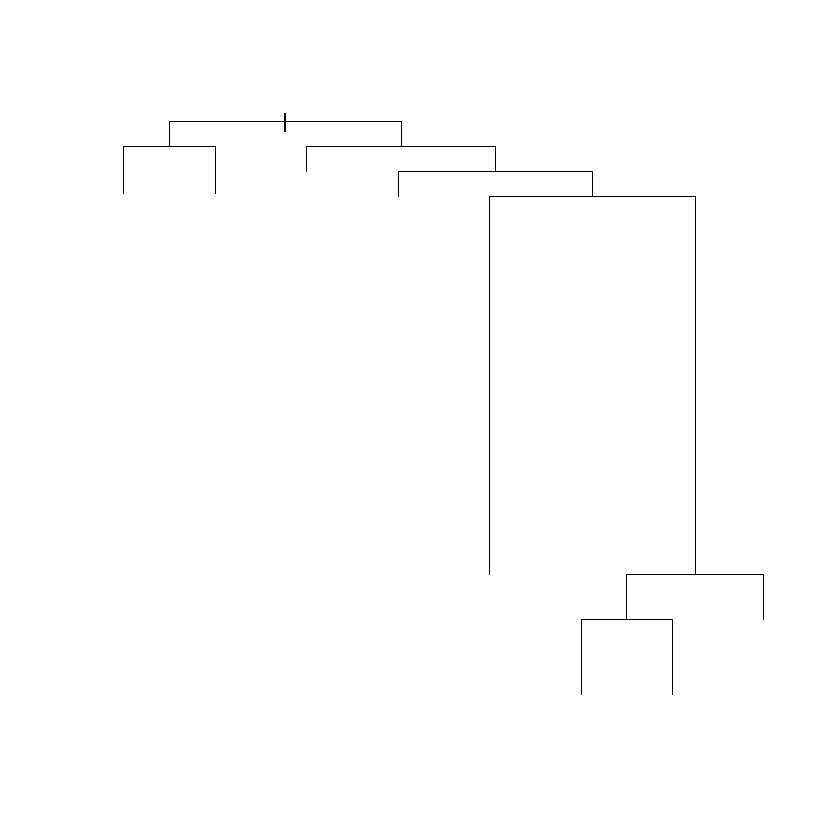

In [86]:
train <- data_dt[trn_idx,]
val <- data_dt[val_idx,]
test <- data_dt[tst_idx,]
tv<-rbind(train,val)
#Base Model
tmp_tree <- rpart(damage_grade ~ ., data = tv, method = "class")

#Plot Decision Tree
plot(tmp_tree)
#control=rpart.control(minsplit=2, cp=0,maxdepth = 8
tmp_tree$cptable

tree package는 multiclass를 다루는데 에러가 나서 rpart를 이용해 tree를 학습했습니다. 위 페키지에서 자체적으로 hyperparameter들을 보여주는데 이때 가장 xerror가 적은 하이퍼 파라미터들을 선택했습니다.
그 값은 

    tmp_tree$control
을 통해서 알 수 있습니다 


Classification tree:
rpart(formula = damage_grade ~ ., data = tv, method = "class")

Variables actually used in tree construction:
[1] foundation_type geo_level_1_id 

Root node error: 47470/110602 = 0.4292

n= 110602 

        CP nsplit rel error  xerror      xstd
1 0.031304      0   1.00000 1.00000 0.0034676
2 0.019802      4   0.87478 0.87478 0.0033925
3 0.015715      6   0.83518 0.83518 0.0033596
4 0.010000      7   0.81946 0.82878 0.0033539


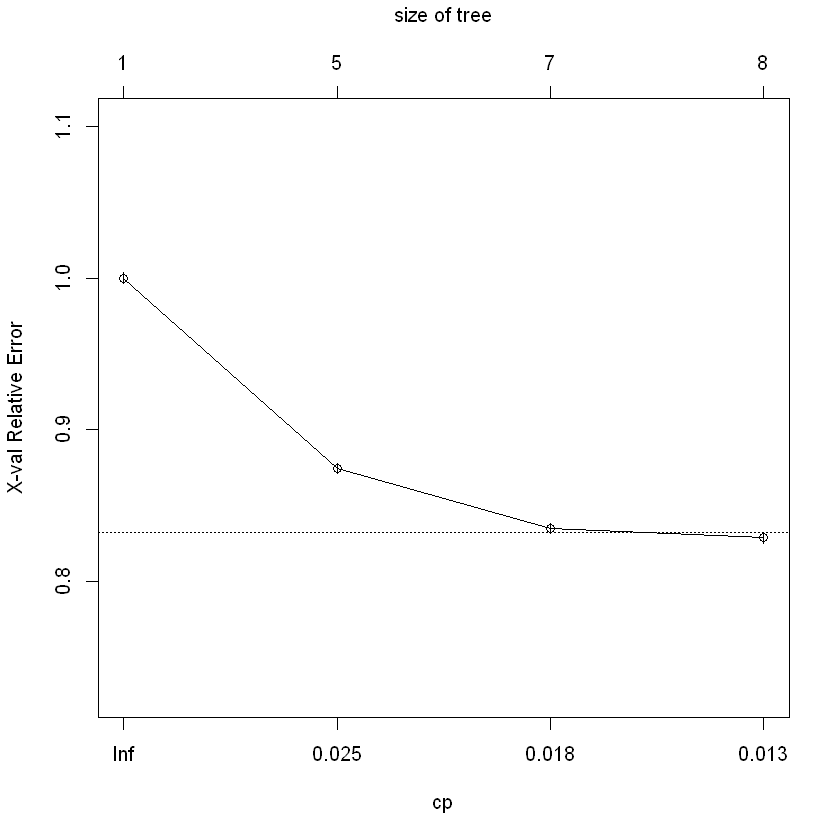

In [87]:
plotcp(tmp_tree)
printcp(tmp_tree)

In [88]:
tmp_tree$control

$minsplit
[1] 20

$minbucket
[1] 7

$cp
[1] 0.01

$maxcompete
[1] 4

$maxsurrogate
[1] 5

$usesurrogate
[1] 2

$surrogatestyle
[1] 0

$maxdepth
[1] 30

$xval
[1] 10

위에서 구한 값들을 기준으로 pre pruning을 한 tree를 만들면 아래와 같다

In [90]:
# Grow a tree with minsplit of 100 and max depth of 8
hr_model_preprun <- rpart(damage_grade ~ ., data = tv, method = "class",  control = rpart.control(cp = 0.01, minsplit = 20))


In [91]:
prediction <- predict(hr_model_preprun,test)
dim(prediction)
head(prediction)
# prediction결과가 같 class가 나올 확률로 나오므로, max.col 함수를 사용한다

[1] 149999      3

,1,2,3
110603,0.037312751,0.7177110,0.24497625
110604,0.113796576,0.6451040,0.24109946
110605,0.040322581,0.5809543,0.37872317
110606,0.572032014,0.4061805,0.02178746
110607,0.271299912,0.6078744,0.12082570
110608,0.007727196,0.3967747,0.59549807


In [92]:
tst_cm <- table(c(1,2,3,max.col(prediction)),c(1,2,3 ,test$damage_grade))
diag(tst_cm) <- diag(tst_cm)-1

In [93]:
perf_eval_multi(tst_cm)

[1] 0.6454043 0.6434247

In [95]:
perf_summary[3,] <- perf_eval_multi(tst_cm)
perf_summary

,ACC,BCR
ANN,0.0000000,0.0000000
ANN+GA,0.6691045,0.5242749
Decision Tree,0.6454043,0.6434247
MLR,0.5923334,0.3760085


# A9 : MLR

multiclass이기 때문에 mlr이 아닌 
    `multinom`
함수를 사용해 학습했습니다

In [118]:
perf_eval3 <- function(cm){
  
  # Simple accuracy
  ACC <- sum(diag(cm))/sum(cm)
  
  # ACC for each class
  A1 <- cm[1,1]/sum(cm[1,])
  A2 <- cm[2,2]/sum(cm[2,])
  A3 <- cm[3,3]/sum(cm[3,])
  BCR <- (A1*A2*A3)^(1/3)
  
  return(c(ACC, BCR))
}


train <- data_mlr[trn_idx,]
val <- data_mlr[val_idx,]
test <- data_mlr[tst_idx,]


lr <- multinom(damage_grade ~., train)
summary(lr)

# weights:  186 (122 variable)
initial  value 54930.614433 
iter  10 value 47862.577362
iter  20 value 43235.000436
iter  30 value 42928.683840
iter  40 value 41320.168579
iter  50 value 40187.228265
iter  60 value 39622.434097
iter  70 value 39375.562486
iter  80 value 39316.545845
iter  90 value 39288.756336
iter 100 value 39283.647349
final  value 39283.647349 
stopped after 100 iterations


Call:
multinom(formula = damage_grade ~ ., data = train)

Coefficients:
  (Intercept) geo_level_1_id geo_level_2_id   geo_level_3_id
2  -0.5278086    -0.03210486 -0.00011255207 -0.0000008112947
3  -2.7075408    -0.01334426 -0.00004894872  0.0000109717600
  count_floors_pre_eq           age area_percentage height_percentage
2           0.2661223 -0.0004373103     0.008612098       -0.00240929
3           0.5688784 -0.0004270358    -0.002518619        0.01379742
  count_families land_surface_condition_o land_surface_condition_t
2      0.3261385               -0.1259392               -0.2670107
3      0.4577386                0.0528984               -0.1480962
  foundation_type_i foundation_type_r foundation_type_u foundation_type_w
2         0.2916837         1.1325320         1.0037070         0.7498519
3        -0.8166591         0.8297164         0.4463931        -0.7432005
  roof_type_q roof_type_x ground_floor_type_m ground_floor_type_v
2   0.3397574  -0.1106164          0.04187778 

각각 선택한 변수들과 그의 유의수준을 알기위해 아래와 같은 코드를 만들었습니다.

In [119]:
# Conduct 2-tailed z-test to compute the p-values
z_stats <- summary(lr)$coefficients/summary(lr)$standard.errors
t(z_stats)

p_value <- (1-pnorm(abs(z_stats), 0, 1))*2
options(scipen=10)
t(p_value)

p<-cbind(t(summary(lr)$coefficients), t(p_value))
colnames(p)<-c("2_coef","3_coef","2_pval","3_pval")

,2,3
(Intercept),-3569.1124511,-16961.5020324
geo_level_1_id,-17.6203829,-6.5897031
geo_level_2_id,-3.0261464,-1.2060813
geo_level_3_id,-0.1882917,2.3442840
count_floors_pre_eq,358.7538465,856.9852258
age,-1.9394030,-1.7751382
area_percentage,3.2098728,-0.7644939
height_percentage,-1.0842152,7.3198332
count_families,2258.0856546,2621.6918354
land_surface_condition_o,-25522.3039309,9042.8663759


,2,3
(Intercept),0.000000000,0.0000000000000000000
geo_level_1_id,0.000000000,0.0000000000440707471
geo_level_2_id,0.002476924,0.2277861333450565962
geo_level_3_id,0.850647957,0.0190636503172687544
count_floors_pre_eq,0.000000000,0.0000000000000000000
age,0.052452280,0.0758750698856767158
area_percentage,0.001327937,0.4445729579726160896
height_percentage,0.278269380,0.0000000000002482459
count_families,0.000000000,0.0000000000000000000
land_surface_condition_o,0.000000000,0.0000000000000000000


In [120]:
p

,2_coef,3_coef,2_pval,3_pval
(Intercept),-0.5278086258972,-2.70754079485,0.000000000,0.0000000000000000000
geo_level_1_id,-0.0321048562144,-0.01334425940,0.000000000,0.0000000000440707471
geo_level_2_id,-0.0001125520685,-0.00004894872,0.002476924,0.2277861333450565962
geo_level_3_id,-0.0000008112947,0.00001097176,0.850647957,0.0190636503172687544
count_floors_pre_eq,0.2661223156878,0.56887841339,0.000000000,0.0000000000000000000
age,-0.0004373102534,-0.00042703581,0.052452280,0.0758750698856767158
area_percentage,0.0086120976845,-0.00251861892,0.001327937,0.4445729579726160896
height_percentage,-0.0024092901641,0.01379741533,0.278269380,0.0000000000002482459
count_families,0.3261384663798,0.45773861803,0.000000000,0.0000000000000000000
land_surface_condition_o,-0.1259391530359,0.05289839915,0.000000000,0.0000000000000000000


In [129]:
p<-data.frame(p)

In [132]:
colnames(p)<-c("2-coef","3-coef","pval2","pval3")
p %>% filter(pval2 > 0.05)
p %>% filter(pval3 > 0.05)

,2-coef,3-coef,pval2,pval3
,<dbl>,<dbl>,<dbl>,<dbl>
geo_level_3_id,-0.0000008112947,0.00001097176,0.85064796,0.0190636503172687544
age,-0.0004373102534,-0.00042703581,0.05245228,0.0758750698856767158
height_percentage,-0.0024092901641,0.01379741533,0.27826938,0.0000000000002482459


,2-coef,3-coef,pval2,pval3
,<dbl>,<dbl>,<dbl>,<dbl>
geo_level_2_id,-0.0001125521,-0.00004894872,0.002476924,0.22778613
age,-0.0004373103,-0.00042703581,0.052452280,0.07587507
area_percentage,0.0086120977,-0.00251861892,0.001327937,0.44457296


위 코드를 통해 유의수준이 0.05 이상인 변수들을 찾으면 위와 같이 나옵니다. 이중에서 다른 변수들은 다른 모델에서 유의수준이 낮으니까 괜찮지만, age는 모든 모델에서 유의 수준이 0.05이상인데 변수로 선택되었다는 점이 신기합니다.

In [79]:
# Predict the class probability
tst <-rbind(val,test)
ml_logit_haty <- predict(lr, type="probs", newdata = tst)
ml_logit_haty[1:10,]

# Predict the class label
ml_logit_prey <- predict(lr, newdata = tst)

cfmatrix <- table(tst$damage_grade, ml_logit_prey)
cfmatrix


,1,2,3
50001,0.026624159,0.5359656,0.4374103
50002,0.096775991,0.4816284,0.4215956
50003,0.064551160,0.5825076,0.3529412
50004,0.073771710,0.6667788,0.2594495
50005,0.024910848,0.5351836,0.4399056
50006,0.001943729,0.3175822,0.6804740
50007,0.013399645,0.6639646,0.3226357
50008,0.021595008,0.5309140,0.4474910
50009,0.041663475,0.5716279,0.3867087
50010,0.046947434,0.7477505,0.2053021


   ml_logit_prey
         1      2      3
  1   6156  13694    501
  2   4368 104376  11017
  3    404  55871  14214

In [96]:
perf_summary[4,] <- perf_eval3(cfmatrix)
perf_summary

,ACC,BCR
ANN,0.0000000,0.0000000
ANN+GA,0.6691045,0.5242749
Decision Tree,0.6454043,0.6434247
MLR,0.5923334,0.3760085


In [102]:
perf_summary

,ACC,BCR
ANN,0.6721845,0.5227321
ANN+GA,0.6691045,0.5242749
Decision Tree,0.6454043,0.6434247
MLR,0.5923334,0.3760085


위 표를 보면 bcr관점에서 모델을 평가 했을 때는 decision tree가 가장 성능이 좋고,
acc관점에서 모델을 평가했을 때 ann모델이 가장 성능이 좋습니다.

위와 같은 결과가 나온 이유를 추측하자면 ann은 10회 반복해서 가장 성능이 높은 것을 썼기에 acc가 가장 높은 것 같습니다

아마 ann+ga와 decision tree도 10번 반복해서 다시 위 표를 작성한다면 다른 결과나 나올 것 같습니다.

bcr이 decision tree가 가장 높게 나온 이유는 상대적으로 적은 비중의 class들의 특성을 잘 파악했기 떄문이다 라고 생각합니다

그리고 mlr은 모든 분야에서 성능이 가장 안좋은데, 아마 데이터 자체가 선형이 아니고 회귀분석의 가정인 정규성도 만족하지 않기 때문이라고 봅니다